# **Loan Default Prediction using Machine Learning**
---
## **Project Overview**
This project involves analyzing a dataset related to loans, with the objective of predicting whether a loan will default. The dataset includes various features such as personal details, financial information, and loan characteristics, which can be used to assess the likelihood of loan defaults. The goal is to build a predictive model using this data.
## **Dataset Description**
The dataset contains **165,865** entries and **22 columns**, with the following key features:
- **Personal Information**: Loan ID, Name, Email, Phone, City, Age, Marital Status, Employment Type, and Education.
- **Financial Information**: Income, Loan Amount, Credit Score, Monthly Employment Duration, and Debt-to-Income Ratio (DTIRatio).
- **Loan Information**: Loan Term, Interest Rate, Loan Purpose, Mortgage status, Dependents, and whether the borrower has a Co-Signer.
- **Target Variable**: **Default**, indicating whether the loan was defaulted (1) or not (0).

___

# **Importing required libraries**

In [1]:
import pandas as pd # Data manipulation and analysis
import matplotlib.pyplot as plt # Data visualization with plots
import seaborn as sns # Statistical data visualization
from sklearn.tree import plot_tree # Decision tree visualization
import plotly.graph_objects as go #  Interactive data visualization
import plotly.io as pio # Plotly input/output handling

from sklearn.preprocessing import LabelEncoder # Encoding categorical variables
from sklearn.linear_model import LogisticRegression # Logistic classification algorithm
from sklearn.tree import DecisionTreeClassifier # Tree-based classification model
from sklearn.ensemble import RandomForestClassifier # Ensemble of decision trees
from sklearn.model_selection import RandomizedSearchCV # Hyperparameter optimization tool
from sklearn.svm import SVC # Support Vector Classifier

from xgboost import XGBClassifier # Gradient boosting classifier
from sklearn.preprocessing import StandardScaler # Data standardization tool
from sklearn.neighbors import KNeighborsClassifier # Nearest neighbor classification
from sklearn.naive_bayes import GaussianNB # Naive Bayes classification
from sklearn.cluster import KMeans # Clustering data into groups
from sklearn.decomposition import PCA # Dimensionality reduction technique
from sklearn.cluster import AgglomerativeClustering # Hierarchical clustering method

from sklearn.model_selection import train_test_split # Splitting data for training/testing
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report, confusion_matrix, accuracy_score, silhouette_score # 
# accuracy_score: Evaluating model performance
# roc_curve: ROC curve generation
# precision_recall_curve: Precision-recall evaluation
# classification_report: Performance metric summary
# confusion_matrix: Classification error matrix
# silhouette_score: Cluster quality assessment
from scipy.cluster.hierarchy import dendrogram, linkage #Visualizing hierarchical clustering & Hierarchical clustering computation

___

### After this will we get basic information from data to check weather we have to clean data or not.

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Desktop\uni\Mechine Learning\project\Loan Default Dataset.csv")
df.head()

LoanID             Name                     Email            Phone  \
0  N3137U12R5       Raja Imran       rajaimran@gmail.com  +92 340 5555488   
1  EVEBR3SNC9     Nabeel Haris     nabeelharis@gmail.com  +92 339 2414194   
2  9OZH3BS3TW       Swan Osman       swanosman@gmail.com  +92 312 5268586   
3  VYLHMG9VLM  Sarfaraz Furqan  sarfarazfurqan@gmail.com  +92 364 7769007   
4  XWY1HDNHCX     Minahil Ayat     minahilayat@gmail.com  +92 327 9765962   

         City  Age    Income  LoanAmount  CreditScore  MonthsEmployed  ...  \
0      Multan   46   72686.0     86890.0        747.0              32  ...   
1  Faisalabad   38   88921.0    244430.0        542.0              67  ...   
2   Islamabad   50  113443.0    249999.0        622.0              18  ...   
3     Karachi   39  116966.0     93717.0        732.0              65  ...   
4     Karachi   45  106540.0     96464.0        823.0              56  ...   

   LoanTerm  DTIRatio    Education  EmploymentType MaritalStatus HasMortgage  \
0        48      0.70   Bachelor's       Full-time       Married         Yes   
1        60      0.81   Bachelor's       Full-time      Divorced         Yes   
2        60      0.56  High School       Full-time       Married          No   
3        60      0.44     Master's   Self-employed      Divorced         Yes   
4        60      0.90          PhD   Self-employed      Divorced          No   

  HasDependents LoanPurpose HasCoSigner Default  
0           Yes        Auto          No       0  
1            No    Business         Yes       0  
2            No    Business         Yes       0  
3            No       Other         Yes       1  
4           Yes        Home          No       0  

[5 rows x 22 columns]

In [3]:
df.shape # checking shape

(165865, 22)

In [4]:
df.dtypes # check data types 

LoanID             object
Name               object
Email              object
Phone              object
City               object
Age                 int64
Income            float64
LoanAmount        float64
CreditScore       float64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default            object
dtype: object

In [ ]:
df.info() # check infromation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165865 entries, 0 to 165864
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          165865 non-null  object 
 1   Name            165865 non-null  object 
 2   Email           165865 non-null  object 
 3   Phone           165865 non-null  object 
 4   City            165865 non-null  object 
 5   Age             165865 non-null  int64  
 6   Income          165865 non-null  float64
 7   LoanAmount      165865 non-null  float64
 8   CreditScore     161880 non-null  float64
 9   MonthsEmployed  165865 non-null  int64  
 10  NumCreditLines  165865 non-null  int64  
 11  InterestRate    165865 non-null  float64
 12  LoanTerm        165865 non-null  int64  
 13  DTIRatio        165865 non-null  float64
 14  Education       165164 non-null  object 
 15  EmploymentType  165122 non-null  object 
 16  MaritalStatus   165865 non-null  object 
 17  HasMortgag

___

# **Cleaning Data**

In [ ]:
df.isnull().sum() # check count of null values

LoanID               0
Name                 0
Email                0
Phone                0
City                 0
Age                  0
Income               0
LoanAmount           0
CreditScore       3985
MonthsEmployed       0
NumCreditLines       0
InterestRate         0
LoanTerm             0
DTIRatio             0
Education          701
EmploymentType     743
MaritalStatus        0
HasMortgage       1409
HasDependents        0
LoanPurpose        733
HasCoSigner          0
Default           4881
dtype: int64

In [ ]:
df.dropna(inplace = True) # Since the data is mostly categorical it's prefered to drop them.

df.isnull().sum() # check for null vaules again

LoanID            0
Name              0
Email             0
Phone             0
City              0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [8]:
df.shape # after droping null values check the chape of our data

(154865, 22)

In [9]:
df.columns # see the columns, bcz we have some column that should be int but they are float 

Index(['LoanID', 'Name', 'Email', 'Phone', 'City', 'Age', 'Income',
       'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines',
       'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType',
       'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose',
       'HasCoSigner', 'Default'],
      dtype='object')

In [10]:
# Converting data types of folst columns to int

df['Income'] = df['Income'].astype(int)
df['LoanAmount'] = df['LoanAmount'].astype(int)
df['CreditScore'] = df['CreditScore'].astype(int)
df['InterestRate'] = df['InterestRate'].astype(int)

In [11]:
df.dtypes # check dtypes again

LoanID             object
Name               object
Email              object
Phone              object
City               object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate        int64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default            object
dtype: object

In [12]:
round(df.describe(),1)

Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
count  154865.0  154865.0    154865.0     154865.0        154865.0   
mean       36.3   71333.5    114549.9        557.2            52.3   
std        25.4   48959.1     76099.1        201.6            39.2   
min       -50.0  -49997.0    -24994.0        -50.0           -50.0   
25%        27.0   39164.0     49053.0        425.0            22.0   
50%        41.0   75521.0    115203.0        570.0            53.0   
75%        54.0  109909.0    177260.0        713.0            84.0   
max        69.0  149999.0    249999.0        900.0           119.0   

       NumCreditLines  InterestRate  LoanTerm  DTIRatio  
count        154865.0      154865.0  154865.0  154865.0  
mean              2.3          15.2      37.2       0.5  
std               1.3          15.2      22.4       0.3  
min              -3.0          -3.0     -50.0      -0.5  
25%               1.0           7.0      24.0       0.3  
50%               2.0          13.0      36.0       0.5  
75%               3.0          20.0      53.0       0.7  
max               5.0         100.0     120.0       2.0

### Describe Summary Interpretation

1. **Age**:
   - The average age is 36.3 years, but there are outliers with a minimum of -50 years (likely erroneous data).
   - Most ages range between 27 (25th percentile) and 54 (75th percentile).

2. **Income**:
   - The average income is $71,333.5 with a standard deviation of $48,959.1, indicating significant variability.
   - There are outliers with negative incomes, which may indicate data errors.

3. **LoanAmount**:
   - The average loan amount is $114,549.9, with a wide range from -$24,994 to $249,999, suggesting potential data issues.

4. **CreditScore**:
   - The average credit score is 557.2, with most values between 425 and 713.
   - The minimum credit score of -50 indicates data quality issues.

5. **MonthsEmployed**:
   - The average employment duration is 52.3 months, ranging widely from -50 to 119 months, with negative values indicating potential errors.

6. **NumCreditLines**:
   - The average number of credit lines is 2.3, with most people having between 1 and 3 credit lines.

7. **InterestRate**:
   - The average interest rate is 15.2%, with some extremely high values up to 100%.

8. **LoanTerm**:
   - Loan terms average 37.2 months, with a wide range up to 120 months.

9. **DTIRatio (Debt-to-Income Ratio)**:
   - The average DTI ratio is 0.5, with most values ranging between 0.3 and 0.7.
   - Some values exceed 1, which may warrant further investigation.

### Observations
- **Data Quality Issues**:
  - Negative values in columns like `Age`, `Income`, `LoanAmount`, `CreditScore`, and `MonthsEmployed` suggest data errors.
- **Further Action**:
  - Clean the dataset by handling outliers and correcting or removing erroneous data.
  - Consider normalizing features like `Income` and `LoanAmount` due to high variability.


In [13]:
# In describing we got many values less than 0. So here lets again see min & max of these column. 

print(f"Min of Age is: {df['Age'].min()}")
print(f"Max of Age is: {df['Age'].max()}")
print(f"\nMin of Income is: {df['Income'].min()}")
print(f"Max of Income is: {df['Income'].max()}")
print(f"\nMin of LoanAmount is: {df['LoanAmount'].min()}")
print(f"Max of LoanAmount is: {df['LoanAmount'].max()}")
print(f"\nMin of CreditScore is: {df['CreditScore'].min()}")
print(f"Max of CreditScore is: {df['CreditScore'].max()}")
print(f"\nMin of MonthsEmployed is: {df['MonthsEmployed'].min()}")
print(f"Max of MonthsEmployed is: {df['MonthsEmployed'].max()}")
print(f"\nMin of NumCreditLines is: {df['NumCreditLines'].min()}")
print(f"Max of NumCreditLines is: {df['NumCreditLines'].max()}")
print(f"\nMin of InterestRate is: {df['InterestRate'].min()}")
print(f"Max of InterestRate is: {df['InterestRate'].max()}")
print(f"\nMin of LoanTerm is: {df['LoanTerm'].min()}")
print(f"Max of LoanTerm is: {df['LoanTerm'].max()}")
print(f"\nMin of DTIRatio is: {df['DTIRatio'].min()}")
print(f"Max of DTIRatio is: {df['DTIRatio'].max()}")

Min of Age is: -50
Max of Age is: 69

Min of Income is: -49997
Max of Income is: 149999

Min of LoanAmount is: -24994
Max of LoanAmount is: 249999

Min of CreditScore is: -50
Max of CreditScore is: 900

Min of MonthsEmployed is: -50
Max of MonthsEmployed is: 119

Min of NumCreditLines is: -3
Max of NumCreditLines is: 5

Min of InterestRate is: -3
Max of InterestRate is: 100

Min of LoanTerm is: -50
Max of LoanTerm is: 120

Min of DTIRatio is: -0.5
Max of DTIRatio is: 2.0


In [ ]:
# here remove invlaid data mostly which is less than 0 and in `Age` remove values less than 18 

df = df[
    (df['Age'] > 18) &
    (df['Income'] > 0) &
    (df['LoanAmount'] > 0) &
    (df['CreditScore'] > 0) &
    (df['MonthsEmployed'] > 0) &
    (df['NumCreditLines'] > 0) &
    (df['InterestRate'] > 0) &
    (df['LoanTerm'] > 0) &
    (df['DTIRatio'] > 0)
]

df.head()


LoanID             Name                     Email            Phone  \
0  N3137U12R5       Raja Imran       rajaimran@gmail.com  +92 340 5555488   
1  EVEBR3SNC9     Nabeel Haris     nabeelharis@gmail.com  +92 339 2414194   
2  9OZH3BS3TW       Swan Osman       swanosman@gmail.com  +92 312 5268586   
3  VYLHMG9VLM  Sarfaraz Furqan  sarfarazfurqan@gmail.com  +92 364 7769007   
4  XWY1HDNHCX     Minahil Ayat     minahilayat@gmail.com  +92 327 9765962   

         City  Age  Income  LoanAmount  CreditScore  MonthsEmployed  ...  \
0      Multan   46   72686       86890          747              32  ...   
1  Faisalabad   38   88921      244430          542              67  ...   
2   Islamabad   50  113443      249999          622              18  ...   
3     Karachi   39  116966       93717          732              65  ...   
4     Karachi   45  106540       96464          823              56  ...   

   LoanTerm  DTIRatio    Education  EmploymentType MaritalStatus HasMortgage  \
0        48      0.70   Bachelor's       Full-time       Married         Yes   
1        60      0.81   Bachelor's       Full-time      Divorced         Yes   
2        60      0.56  High School       Full-time       Married          No   
3        60      0.44     Master's   Self-employed      Divorced         Yes   
4        60      0.90          PhD   Self-employed      Divorced          No   

  HasDependents LoanPurpose HasCoSigner Default  
0           Yes        Auto          No       0  
1            No    Business         Yes       0  
2            No    Business         Yes       0  
3            No       Other         Yes       1  
4           Yes        Home          No       0  

[5 rows x 22 columns]

In [ ]:
# No here lets again see min & max of these column just to comfrim 

print(f"Min of Age is: {df['Age'].min()}")
print(f"Max of Age is: {df['Age'].max()}")
print(f"\nMin of Income is: {df['Income'].min()}")
print(f"Max of Income is: {df['Income'].max()}")
print(f"\nMin of LoanAmount is: {df['LoanAmount'].min()}")
print(f"Max of LoanAmount is: {df['LoanAmount'].max()}")
print(f"\nMin of CreditScore is: {df['CreditScore'].min()}")
print(f"Max of CreditScore is: {df['CreditScore'].max()}")
print(f"\nMin of MonthsEmployed is: {df['MonthsEmployed'].min()}")
print(f"Max of MonthsEmployed is: {df['MonthsEmployed'].max()}")
print(f"\nMin of NumCreditLines is: {df['NumCreditLines'].min()}")
print(f"Max of NumCreditLines is: {df['NumCreditLines'].max()}")
print(f"\nMin of InterestRate is: {df['InterestRate'].min()}")
print(f"Max of InterestRate is: {df['InterestRate'].max()}")
print(f"\nMin of LoanTerm is: {df['LoanTerm'].min()}")
print(f"Max of LoanTerm is: {df['LoanTerm'].max()}")
print(f"\nMin of DTIRatio is: {df['DTIRatio'].min()}")
print(f"Max of DTIRatio is: {df['DTIRatio'].max()}")

Min of Age is: 19
Max of Age is: 69

Min of Income is: 15000
Max of Income is: 149999

Min of LoanAmount is: 5000
Max of LoanAmount is: 249999

Min of CreditScore is: 300
Max of CreditScore is: 849

Min of MonthsEmployed is: 1
Max of MonthsEmployed is: 119

Min of NumCreditLines is: 1
Max of NumCreditLines is: 4

Min of InterestRate is: 2
Max of InterestRate is: 25

Min of LoanTerm is: 12
Max of LoanTerm is: 60

Min of DTIRatio is: 0.1
Max of DTIRatio is: 0.9


In [16]:
df.shape # now again see shape to see whats left after that this cleaning

(132014, 22)

In [17]:
df.columns

Index(['LoanID', 'Name', 'Email', 'Phone', 'City', 'Age', 'Income',
       'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines',
       'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType',
       'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose',
       'HasCoSigner', 'Default'],
      dtype='object')

In [ ]:
# Since we don't need columns like Loan ID, Name, Email, Phone. Beacuse they will be changing and and will disturb our model. So its goodd to drop that. 

df.drop(columns=['LoanID', 'Name', 'Email','Phone'], inplace = True)
df.head()

City  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0      Multan   46   72686       86890          747              32   
1  Faisalabad   38   88921      244430          542              67   
2   Islamabad   50  113443      249999          622              18   
3     Karachi   39  116966       93717          732              65   
4     Karachi   45  106540       96464          823              56   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4            15        48      0.70   Bachelor's   
1               2             5        60      0.81   Bachelor's   
2               4            21        60      0.56  High School   
3               2            24        60      0.44     Master's   
4               3            16        60      0.90          PhD   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time       Married         Yes           Yes        Auto   
1      Full-time      Divorced         Yes            No    Business   
2      Full-time       Married          No            No    Business   
3  Self-employed      Divorced         Yes            No       Other   
4  Self-employed      Divorced          No           Yes        Home   

  HasCoSigner Default  
0          No       0  
1         Yes       0  
2         Yes       0  
3         Yes       1  
4          No       0

In [ ]:
df.select_dtypes(object).nunique() # Now check values anonymous values in object type columns

City              11
Education          8
EmploymentType     7
MaritalStatus      6
HasMortgage        4
HasDependents      4
LoanPurpose       10
HasCoSigner        3
Default            2
dtype: int64

In [20]:
df["Education"].unique() # to see anonymous values see unique values in categorial columns

array(["Bachelor's", 'High School', "Master's", 'PhD', 'PnD', 'Mastaars',
       "$$Bachelor's", 'HighSchol'], dtype=object)

In [ ]:
# replace anonymous values with coreect values

df['Education'] = df['Education'].replace({
    "$$Bachelor's": "Bachelor's",
    'HighSchol': 'High School',
    'Mastaars': "Master's",
    'PnD': 'PhD'
})

df['Education'].unique()

array(["Bachelor's", 'High School', "Master's", 'PhD'], dtype=object)

In [22]:
df["EmploymentType"].unique()

array(['Full-time', 'Self-employed', 'Part-time', 'Unemployed',
       'SelfEmpl0yed', 'Ful-Time', 'Par-tIme'], dtype=object)

In [23]:
df['EmploymentType'] = df['EmploymentType'].replace({
    'Ful-Time': 'Full-time',
    'SelfEmpl0yed': 'Self-employed',
    'Par-tIme': "Part-time"
})

df['EmploymentType'].unique()

array(['Full-time', 'Self-employed', 'Part-time', 'Unemployed'],
      dtype=object)

In [24]:
df["MaritalStatus"].unique()

array(['Married', 'Divorced', 'Single', 'Divrced', 'Marrid',
       'Complicated'], dtype=object)

In [25]:
df['MaritalStatus'] = df['MaritalStatus'].replace({
    'Marrid': 'Married',
    'Divrced': 'Divorced',
    'Complicated': "Single"
})

df['MaritalStatus'].unique()

array(['Married', 'Divorced', 'Single'], dtype=object)

In [26]:
df["HasMortgage"].unique()

array(['Yes', 'No', 'Unknown', 'Maybe'], dtype=object)

In [27]:
df = df[~((df['HasMortgage'] == 'Unknown') | (df['HasMortgage'] == 'Maybe'))]
df['HasMortgage'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
df["HasDependents"].unique()

array(['Yes', 'No', 'Unknown', 'Maybe'], dtype=object)

In [29]:
df = df[~((df['HasDependents'] == 'Unknown') | (df['HasDependents'] == 'Maybe'))]
df["HasDependents"].unique()

array(['Yes', 'No'], dtype=object)

In [30]:
df['LoanPurpose'].unique()

array(['Auto', 'Business', 'Other', 'Home', 'Education', 'Hom', 'Biz',
       'Otther', 'Edcation', 'Aut0'], dtype=object)

In [31]:
df['LoanPurpose'] = df['LoanPurpose'].replace({
    'Aut0': 'Auto',
    'Biz': 'Business',
    'Hom': 'Home',
    'Edcation':'Education',
    'Otther':'Other'
})

df['LoanPurpose'].unique()

array(['Auto', 'Business', 'Other', 'Home', 'Education'], dtype=object)

In [32]:
df['HasCoSigner'].unique()

array(['No', 'Yes', 'Unknown'], dtype=object)

In [33]:
df = df[~(df['HasCoSigner'] == 'Unknown')]
df["HasCoSigner"].unique()

array(['No', 'Yes'], dtype=object)

In [34]:
df['Default'].unique()

array(['0', '1'], dtype=object)

In [35]:
df.head() # So here is our clean data

City  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0      Multan   46   72686       86890          747              32   
1  Faisalabad   38   88921      244430          542              67   
2   Islamabad   50  113443      249999          622              18   
3     Karachi   39  116966       93717          732              65   
4     Karachi   45  106540       96464          823              56   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4            15        48      0.70   Bachelor's   
1               2             5        60      0.81   Bachelor's   
2               4            21        60      0.56  High School   
3               2            24        60      0.44     Master's   
4               3            16        60      0.90          PhD   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time       Married         Yes           Yes        Auto   
1      Full-time      Divorced         Yes            No    Business   
2      Full-time       Married          No            No    Business   
3  Self-employed      Divorced         Yes            No       Other   
4  Self-employed      Divorced          No           Yes        Home   

  HasCoSigner Default  
0          No       0  
1         Yes       0  
2         Yes       0  
3         Yes       1  
4          No       0

In [36]:
df.shape # here is shape of corrected  data

(128748, 18)

In [37]:
# Encode categorical columns into numeric format using LabelEncoder.

categorical_columns = df.select_dtypes(object).columns

label_encoder = LabelEncoder()
df1 = df.copy()

for column in categorical_columns:
    df1[column] = label_encoder.fit_transform(df[column])
    
df1.head()

City  Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0     6   46   72686       86890          747              32               4   
1     0   38   88921      244430          542              67               2   
2     3   50  113443      249999          622              18               4   
3     4   39  116966       93717          732              65               2   
4     4   45  106540       96464          823              56               3   

   InterestRate  LoanTerm  DTIRatio  Education  EmploymentType  MaritalStatus  \
0            15        48      0.70          0               0              1   
1             5        60      0.81          0               0              0   
2            21        60      0.56          1               0              1   
3            24        60      0.44          2               2              0   
4            16        60      0.90          3               2              0   

   HasMortgage  HasDependents  LoanPurpose  HasCoSigner  Default  
0            1              1            0            0        0  
1            1              0            1            1        0  
2            0              0            1            1        0  
3            1              0            4            1        1  
4            0              1            3            0        0

In [38]:
df1.dtypes

City                int64
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate        int64
LoanTerm            int64
DTIRatio          float64
Education           int64
EmploymentType      int64
MaritalStatus       int64
HasMortgage         int64
HasDependents       int64
LoanPurpose         int64
HasCoSigner         int64
Default             int64
dtype: object

___

# Data Visullization and Basic EDA

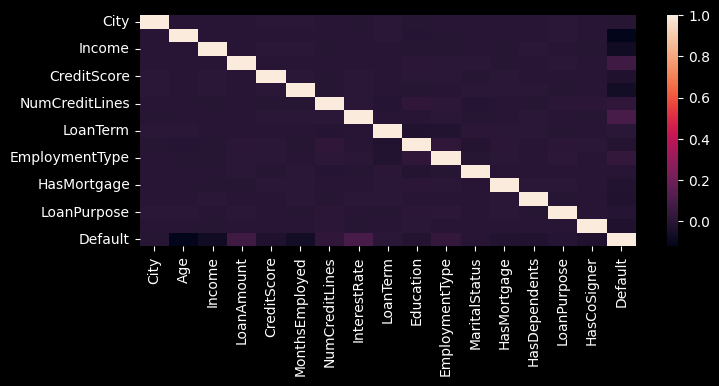

In [39]:
plt.style.use('dark_background')

plt.figure(figsize=(8,3))
sns.heatmap(df1.select_dtypes(int).corr())
plt.show()

The heatmap displays the correlation between various features in the dataset. Key interpretations include:

1. **Diagonal values**: Always equal to 1, as they represent the correlation of a variable with itself.
2. **Feature relationships**:
   - Most features have weak correlations with each other, as the off-diagonal values are generally low.
   - High correlation between specific pairs of features (if present) may indicate redundancy or multicollinearity in the dataset.
3. **Target variable (`Default`)**:
   - Check its correlations with other features (e.g., `CreditScore`, `Income`) to identify potential predictors of default.

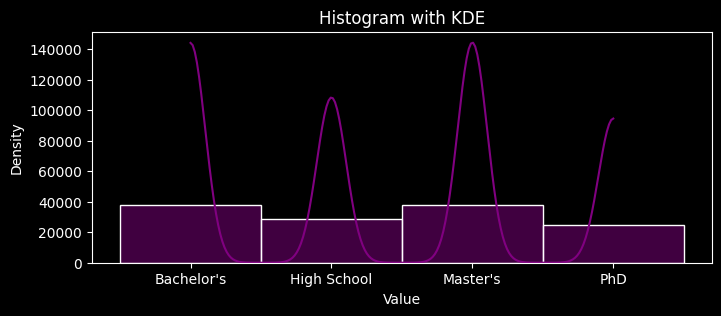

In [40]:
plt.figure(figsize=(8, 3))
sns.histplot(df['Education'], kde=True, bins=30, color='purple')
plt.title('Histogram with KDE')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


This histogram with KDE overlay shows the distribution of educational levels in the dataset:

1. **Distinct Peaks**: The KDE curve indicates four distinct peaks corresponding to the four categories: Bachelor's, High School, Master's, and PhD.
2. **High Frequency**: Categories like "High School" and "Master's" seem to have the highest frequency (density), suggesting that most individuals in the dataset belong to these educational levels.
3. **Lower Frequency**: "Bachelor's" and "PhD" appear less common compared to the other categories.

This distribution helps understand the spread of education levels in the data and may provide insights for further analysis related to education-based segmentation.

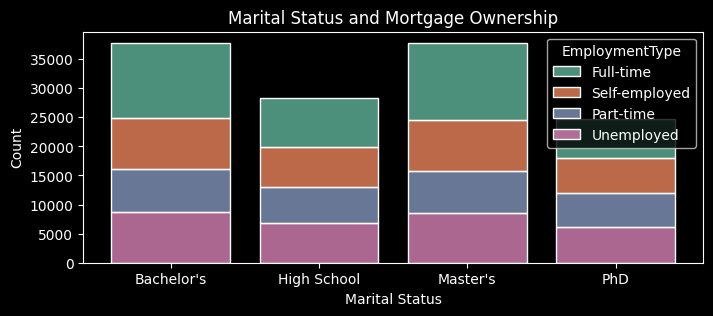

In [ ]:
plt.figure(figsize=(8, 3))
sns.histplot(data=df, x='Education', hue='EmploymentType', multiple='stack', shrink=0.8, palette='Set2')
plt.title('Marital Status and Mortgage Ownership')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


This stacked bar chart displays the distribution of employment types across different educational levels. Key observations include:

1. **Full-Time Employment Dominance**: Across all education levels, "Full-time" employment is the largest group, indicating it is the most common employment type.
2. **Variation Across Education Levels**:
   - "High School" shows slightly fewer individuals compared to "Bachelor's" and "Master's."
   - "PhD" has the smallest count but maintains a similar employment type distribution.
3. **Unemployed Proportion**: The proportion of "Unemployed" individuals remains consistent across all education levels.

This visualization highlights the employment distribution's consistency and slight variation across educational categories.

C:\Users\Dell\AppData\Local\Temp\ipykernel_7084\3643366711.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='EmploymentType', y='Income', palette='coolwarm')


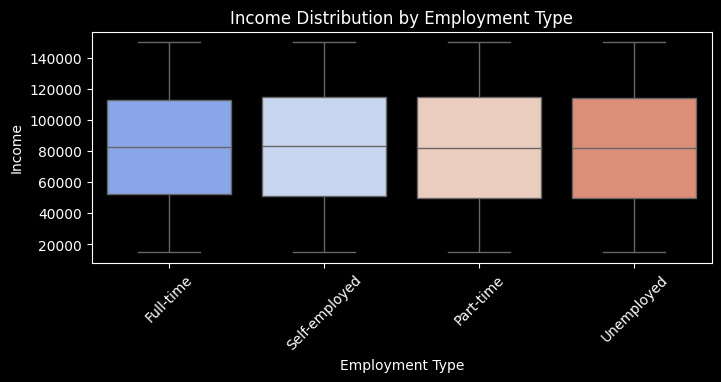

In [ ]:
plt.figure(figsize=(8, 3))
sns.boxplot(data=df, x='EmploymentType', y='Income', palette='coolwarm')
plt.title('Income Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()


This boxplot shows the income distribution across different employment types. Key insights:

1. **Median Income**:
   - The median income is relatively consistent across "Full-time," "Self-employed," and "Part-time" categories.
   - "Unemployed" individuals have the lowest median income.

2. **Spread of Income**:
   - "Full-time" and "Self-employed" categories have a slightly wider range of income compared to "Part-time" and "Unemployed."
   - There is significant variability in income within all employment types, as seen from the interquartile range and whiskers.

3. **Outliers**:
   - All categories have some outliers with exceptionally high incomes.

This plot provides a clear comparison of income variability and central tendencies among employment types.

C:\Users\Dell\AppData\Local\Temp\ipykernel_7084\2386365672.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='LoanPurpose', y='DTIRatio', palette='muted', inner='quartile')


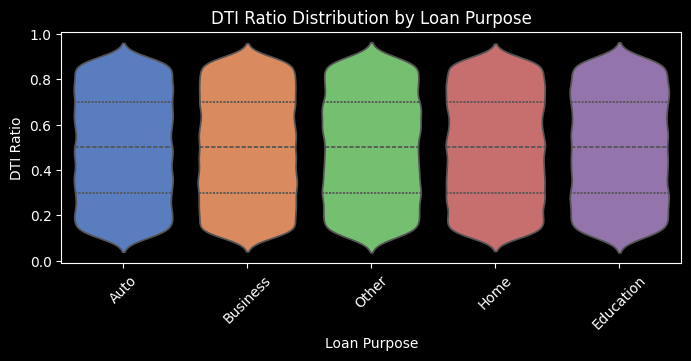

In [ ]:
plt.figure(figsize=(8, 3))
sns.violinplot(data=df, x='LoanPurpose', y='DTIRatio', palette='muted', inner='quartile')
plt.title('DTI Ratio Distribution by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('DTI Ratio')
plt.xticks(rotation=45)
plt.show()


This violin plot shows the distribution of Debt-to-Income (DTI) ratios for different loan purposes. Key observations:

1. **Symmetry**:
   - The distributions for all loan purposes (Auto, Business, Other, Home, and Education) are symmetric and similar in shape.

2. **Median and Quartiles**:
   - The median DTI ratio for all loan purposes is around 0.5, as indicated by the central dotted line.
   - Quartiles are consistent across categories, suggesting similar central tendencies and interquartile ranges.

3. **Range**:
   - DTI ratios across all loan purposes span the full range from 0.0 to 1.0, showing high variability.

The uniformity in distribution suggests that DTI ratios are not heavily dependent on loan purpose.

C:\Users\Dell\AppData\Local\Temp\ipykernel_7084\2019013113.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Education', palette='viridis')


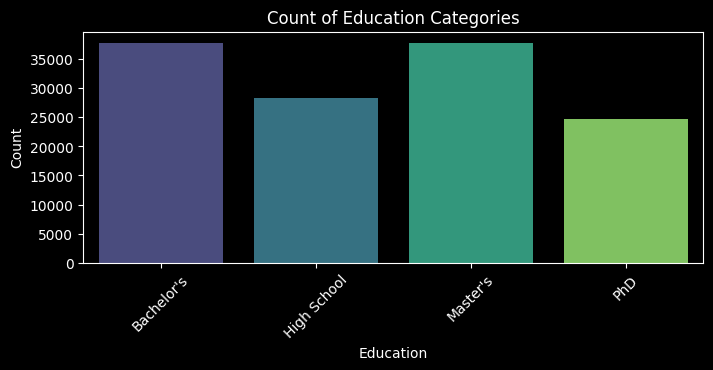

In [44]:
plt.figure(figsize=(8, 3))
sns.countplot(data=df, x='Education', palette='viridis')
plt.title('Count of Education Categories')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


This bar chart illustrates the distribution of individuals across different education levels. Key insights:

1. **Most Common Categories**:
   - "Master's" and "Bachelor's" are the most represented education levels, with similar counts.

2. **Least Common Category**:
   - "PhD" has the smallest count, indicating it is the least common educational attainment in the dataset.

3. **Moderate Representation**:
   - "High School" has a moderate count, less than "Bachelor's" and "Master's" but higher than "PhD."

This distribution suggests a population with a strong representation of individuals holding advanced degrees (Master's and Bachelor's).

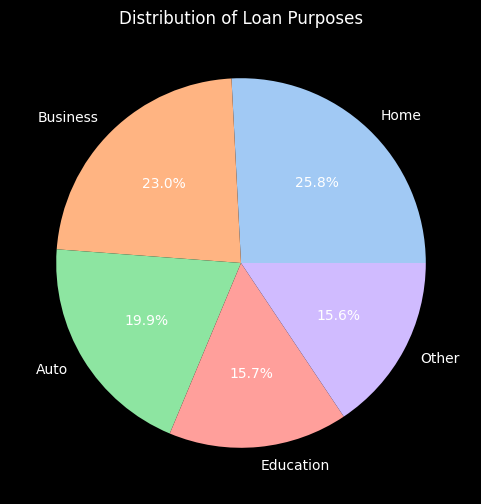

In [45]:
plt.figure(figsize=(6, 6))
df['LoanPurpose'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Loan Purposes')
plt.ylabel('')
plt.show()


This pie chart shows the proportion of different loan purposes in the dataset. Key observations:

1. **Home Loans**:
   - "Home" loans constitute the largest share, accounting for 25.8% of the total.

2. **Business Loans**:
   - "Business" loans are the second most common, making up 23.0%.

3. **Other Purposes**:
   - "Auto" loans (19.9%) and "Education" loans (15.7%) have moderate shares.
   - "Other" loans have the smallest proportion at 15.6%.

The chart highlights that "Home" and "Business" loans are the primary drivers, while "Education" and "Other" loans represent the smaller categories.

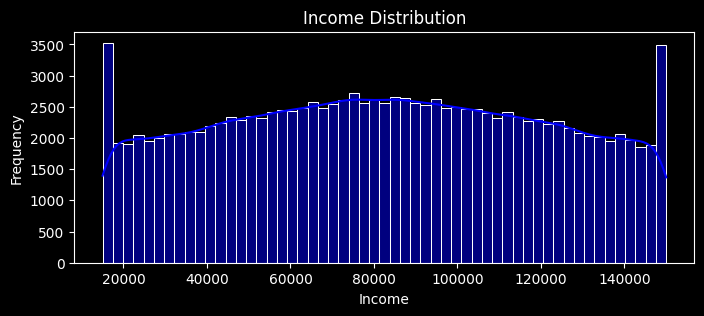

In [46]:
plt.figure(figsize=(8, 3))
sns.histplot(data=df, x='Income', kde=True, color='blue')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


This histogram shows the distribution of income in the dataset. Key points:

1. **Central Tendency**:
   - The income values are approximately evenly distributed, with a slight peak around the middle range (e.g., $80,000).

2. **Extreme Values**:
   - There are sharp spikes at the minimum (around $20,000) and maximum (around $150,000) ends, which might indicate specific thresholds or boundaries in the data.

3. **Uniform Distribution**:
   - Apart from the boundary spikes, the income distribution is relatively flat across the range, suggesting a balanced dataset.

This distribution provides an overview of income variability, with potential outliers at the boundaries.

C:\Users\Dell\AppData\Local\Temp\ipykernel_7084\561765549.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='LoanAmount', palette='coolwarm')


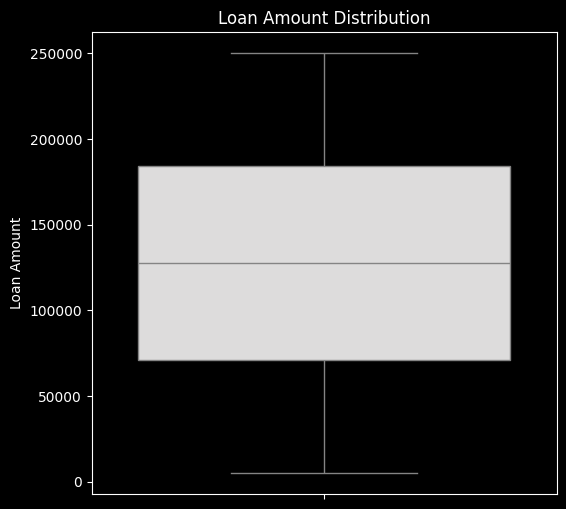

In [47]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, y='LoanAmount', palette='coolwarm')
plt.title('Loan Amount Distribution')
plt.ylabel('Loan Amount')
plt.show()


This boxplot shows the distribution of loan amounts in the dataset. Key observations:

1. **Median Loan Amount**:
   - The median loan amount is around $115,000, as indicated by the central line in the box.

2. **Interquartile Range (IQR)**:
   - The middle 50% of the loan amounts range from approximately $75,000 to $175,000, suggesting moderate variability.

3. **Symmetry**:
   - The distribution appears symmetric, with equal whisker lengths above and below the IQR, indicating no strong skewness.

4. **No Outliers**:
   - The absence of points outside the whiskers suggests no extreme outliers in the loan amount data.

This plot indicates a well-distributed dataset for loan amounts with a central tendency around $115,000.

C:\Users\Dell\AppData\Local\Temp\ipykernel_7084\1524399776.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, y='CreditScore', palette='muted')


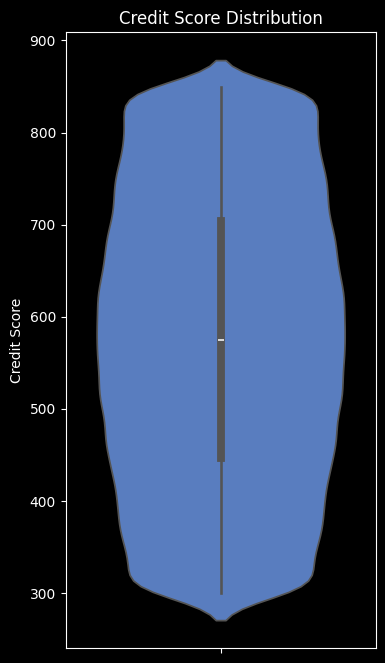

In [48]:
plt.figure(figsize=(4, 8))
sns.violinplot(data=df, y='CreditScore', palette='muted')
plt.title('Credit Score Distribution')
plt.ylabel('Credit Score')
plt.show()


This violin plot represents the distribution of credit scores in the dataset. Key observations:

1. **Central Tendency**:
   - The median credit score is around 600, as shown by the white line in the center.

2. **Distribution Shape**:
   - The distribution is approximately symmetric, with a concentration of values around the median.
   - There is a slightly wider spread in the middle range (500–700).

3. **Range**:
   - Credit scores span from approximately 300 to 900, covering the typical credit score range.

This plot indicates a balanced distribution of credit scores with no extreme skews or visible outliers.

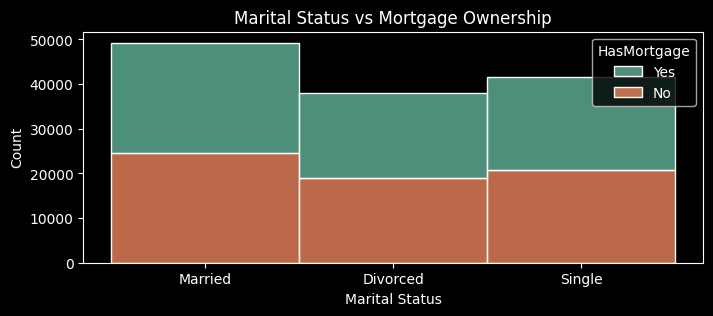

In [49]:
plt.figure(figsize=(8, 3))
sns.histplot(data=df, x='MaritalStatus', hue='HasMortgage', multiple='stack', palette='Set2')
plt.title('Marital Status vs Mortgage Ownership')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


This stacked bar chart shows the relationship between marital status and mortgage ownership. Key observations:

1. **Married Individuals**:
   - The majority of married individuals have a mortgage, as the "Yes" category significantly outweighs the "No" category.

2. **Divorced Individuals**:
   - Among divorced individuals, mortgage ownership is more evenly distributed between "Yes" and "No."

3. **Single Individuals**:
   - Single individuals show a relatively balanced split between those with and without a mortgage, similar to divorced individuals.

This chart highlights that marital status influences mortgage ownership, with married individuals more likely to own a mortgage.

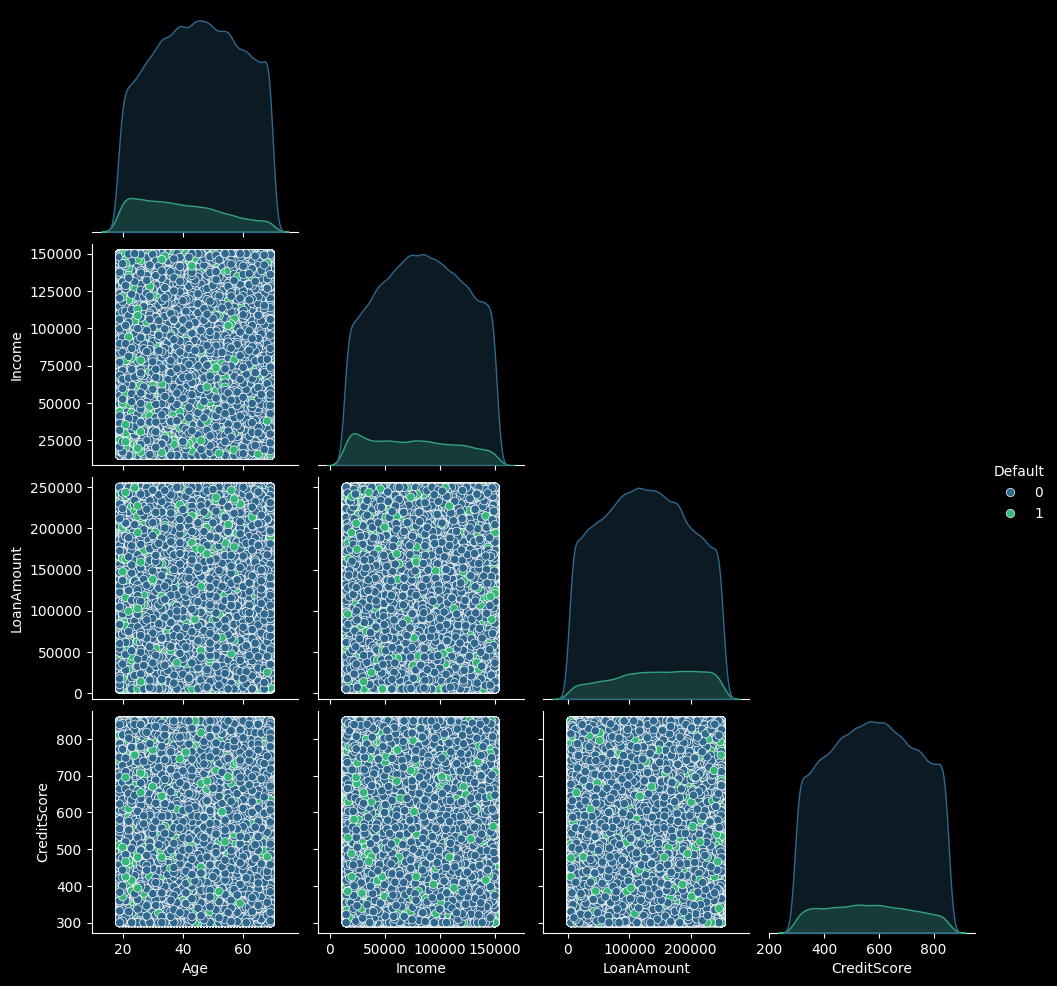

In [50]:
sns.pairplot(df[['Age', 'Income', 'LoanAmount', 'CreditScore', 'Default']], hue='Default', palette='viridis', corner=True)
plt.show()


This pair plot visualizes the relationships between key numeric variables (`Age`, `Income`, `LoanAmount`, and `CreditScore`) in the dataset, differentiated by the `Default` status. Key observations:

1. **Default Distribution**:
   - The majority of points are marked as `Default = 0` (non-default), with fewer points for `Default = 1`.

2. **Age vs. Other Variables**:
   - No clear linear relationships are visible between `Age` and other variables, indicating weak direct correlations.

3. **Income vs. Loan Amount**:
   - There is no apparent pattern between `Income` and `LoanAmount` for either default status, suggesting independence between these variables.

4. **Credit Score and Default**:
   - Defaulted loans (`Default = 1`) are scattered throughout the credit score range, implying credit score alone may not strongly predict default.

5. **Variable Distributions**:
   - The diagonal plots show individual variable distributions. Variables like `Income` and `CreditScore` have smooth, bell-shaped distributions.

This plot provides an overview of relationships and distributions, showing limited direct correlations but offering insights for multivariate analysis.

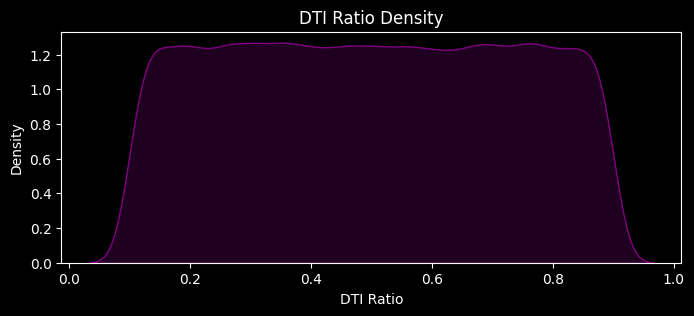

In [51]:
plt.figure(figsize=(8, 3))
sns.kdeplot(data=df, x='DTIRatio', fill=True, color='purple')
plt.title('DTI Ratio Density')
plt.xlabel('DTI Ratio')
plt.show()


This density plot illustrates the distribution of Debt-to-Income (DTI) ratios in the dataset. Key observations:

1. **Uniform Distribution**:
   - The DTI ratio appears to be uniformly distributed, with consistent density across the range of 0.2 to 0.8.

2. **Boundaries**:
   - The density sharply drops at the extremes (0 and 1), indicating the DTI ratio values are mostly within the middle range.

3. **No Skewness**:
   - The plot shows no significant skewness, confirming that the data is evenly distributed.

This uniform distribution suggests a balanced representation of DTI ratios in the dataset.

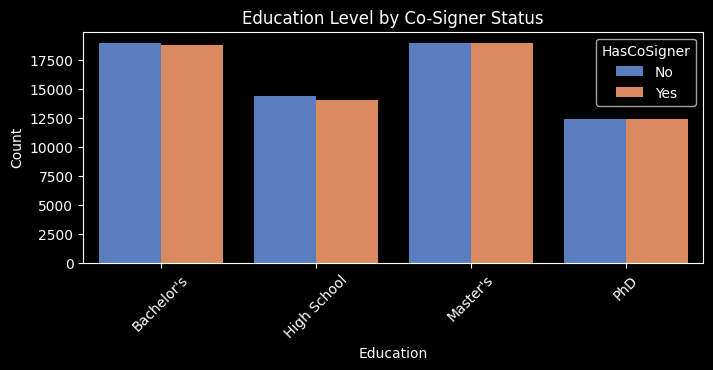

In [52]:
plt.figure(figsize=(8, 3))
sns.countplot(data=df, x='Education', hue='HasCoSigner', palette='muted')
plt.title('Education Level by Co-Signer Status')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


This bar chart shows the relationship between education level and co-signer status (`HasCoSigner`). Key observations:

1. **Bachelor's and Master's**:
   - Individuals with "Bachelor's" and "Master's" education levels have a nearly equal distribution of loans with and without a co-signer.

2. **High School**:
   - "High School" education level shows a slightly lower count compared to "Bachelor's" and "Master's," but the co-signer distribution remains balanced.

3. **PhD**:
   - "PhD" has the smallest count overall, with a roughly equal split between loans with and without a co-signer.

This chart suggests that the decision to have a co-signer does not vary significantly across education levels.

C:\Users\Dell\AppData\Local\Temp\ipykernel_7084\2978225098.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='LoanPurpose', y='Income', palette='Set3')


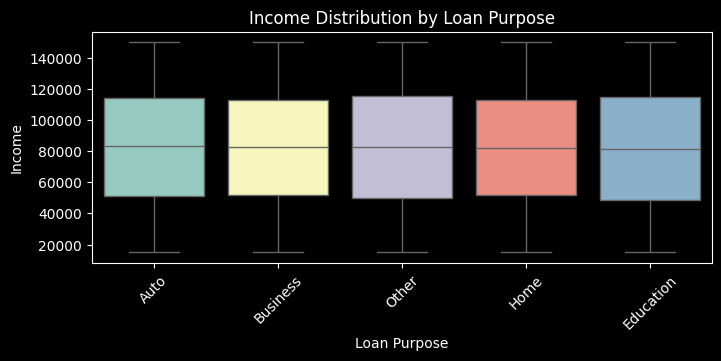

In [53]:
plt.figure(figsize=(8, 3))
sns.boxplot(data=df, x='LoanPurpose', y='Income', palette='Set3')
plt.title('Income Distribution by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()


This boxplot shows the income distribution across different loan purposes. Key observations:

1. **Median Income**:
   - The median income is consistent across all loan purposes, hovering around $75,000–$80,000.

2. **Interquartile Range (IQR)**:
   - The IQR (middle 50% of income) is similar for all loan purposes, suggesting comparable variability within each category.

3. **Range**:
   - All categories show similar ranges, with incomes spanning from approximately $20,000 to $150,000.

4. **No Outliers**:
   - There are no visible outliers, indicating a clean and uniform data distribution.

This plot highlights that income distributions are uniform across different loan purposes, suggesting no strong dependency between income and the loan purpose.

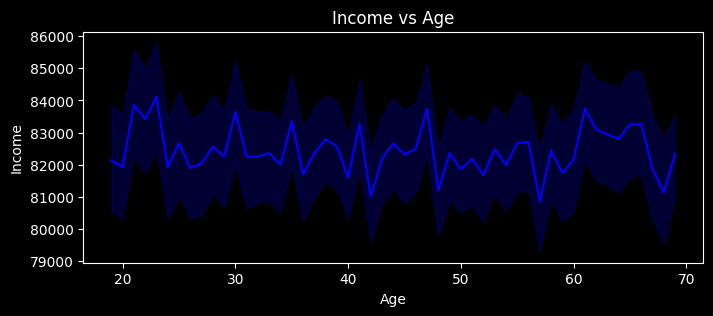

In [54]:
plt.figure(figsize=(8, 3))
df.sort_values(by='Age', inplace=True)
sns.lineplot(data=df, x='Age', y='Income', color='blue')
plt.title('Income vs Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


This line plot shows the relationship between income and age, with a shaded area indicating variability. Key observations:

1. **Overall Income Stability**:
   - The income level remains relatively stable across all age groups, with minor fluctuations.

2. **Variability**:
   - The shaded area highlights income variability, which is consistent across all ages without significant spikes or dips.

3. **No Strong Trend**:
   - There is no clear increasing or decreasing trend between income and age, suggesting income is not strongly dependent on age within this range.

This plot suggests that age has a minimal impact on income levels in the dataset.

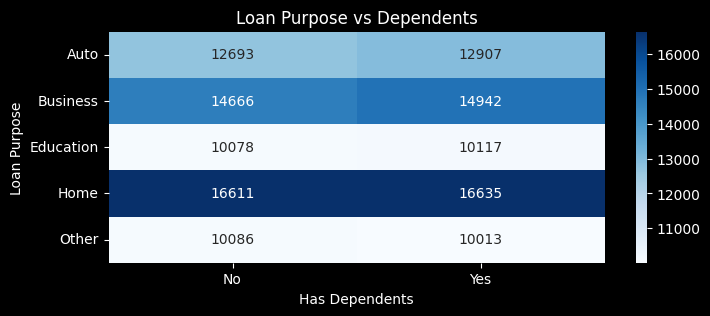

In [55]:
plt.figure(figsize=(8, 3))
cross_tab = pd.crosstab(df['LoanPurpose'], df['HasDependents'])
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
plt.title('Loan Purpose vs Dependents')
plt.xlabel('Has Dependents')
plt.ylabel('Loan Purpose')
plt.show()


This chart visualizes the relationship between **loan purpose** and whether the loan applicants have dependents. Here's an interpretation:

### Key Observations:
1. **Loan Purpose Categories**:
   - The chart includes purposes like "Auto," "Business," "Education," "Home," and "Other."

2. **Dependents (Yes/No)**:
   - The horizontal axis distinguishes between applicants without dependents ("No") and those with dependents ("Yes").

3. **Color Gradient**:
   - The color intensity corresponds to the number of loans in each category, with darker shades indicating higher values.

4. **Numerical Insights**:
   - The **Home** loan category has the highest number of loans, with a nearly equal distribution between applicants with dependents (16,635) and without (16,611).
   - The **Education** loan category has the lowest numbers, with values slightly higher for applicants with dependents (10,117 vs. 10,078).

### Insights:
- Loan purposes like "Home" and "Business" attract a higher volume of applications, regardless of dependent status.
- Applicants with and without dependents tend to apply for loans in similar proportions, as the numbers are closely matched across all loan purposes.

___

# **Appling Alogorithms** 

## Predicitng values by using suprvied learning.
### Reason for not using Regression models: 
##### Regression models are used when have to predict real time value, not binary. For binary (0,1) like default we have to use classifcation. Since we have to predicted defaultness, it could be answered in yes and no (binary)


#### Lets predict values by Classification methods.



---

# **Logistic Regression**

In [ ]:
df1.head()

City  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
134999     3   19   44795      176523          569              72   
58912      7   19   58740      124519          329              28   
36499      7   19   15000      141565          688              34   
116132     3   19   84944      225681          583             107   
61738      8   19   67400      230770          418               3   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
134999               1            11        12      0.77          1   
58912                4            11        48      0.49          1   
36499                3             4        46      0.85          2   
116132               3             9        24      0.35          2   
61738                2            13        36      0.63          0   

        EmploymentType  MaritalStatus  HasMortgage  HasDependents  \
134999               0              2            1              1   
58912                3              1            0              1   
36499                0              2            1              1   
116132               1              2            1              1   
61738                1              2            0              1   

        LoanPurpose  HasCoSigner  Default  
134999            2            0        1  
58912             4            1        0  
36499             1            1        0  
116132            0            1        0  
61738             0            0        1

In [58]:
x_Logistic_Regression = df1.drop(columns='Default')
y_Logistic_Regression = df1['Default']

In [59]:
x_Logistic_Regression.head()

City  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
134999     3   19   44795      176523          569              72   
58912      7   19   58740      124519          329              28   
36499      7   19   15000      141565          688              34   
116132     3   19   84944      225681          583             107   
61738      8   19   67400      230770          418               3   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
134999               1            11        12      0.77          1   
58912                4            11        48      0.49          1   
36499                3             4        46      0.85          2   
116132               3             9        24      0.35          2   
61738                2            13        36      0.63          0   

        EmploymentType  MaritalStatus  HasMortgage  HasDependents  \
134999               0              2            1              1   
58912                3              1            0              1   
36499                0              2            1              1   
116132               1              2            1              1   
61738                1              2            0              1   

        LoanPurpose  HasCoSigner  
134999            2            0  
58912             4            1  
36499             1            1  
116132            0            1  
61738             0            0

In [60]:
y_Logistic_Regression.head()

134999    1
58912     0
36499     0
116132    0
61738     1
Name: Default, dtype: int64

In [61]:
x_train_Logistic_Regression, x_test_Logistic_Regression, y_train_Logistic_Regression, y_test_Logistic_Regression = train_test_split(x_Logistic_Regression, y_Logistic_Regression, test_size=0.3, random_state=199)

print(x_train_Logistic_Regression.shape, x_test_Logistic_Regression.shape, y_train_Logistic_Regression.shape, y_test_Logistic_Regression.shape)


(90123, 17) (38625, 17) (90123,) (38625,)


In [62]:

model = LogisticRegression(class_weight='balanced')
model.fit(x_train_Logistic_Regression, y_train_Logistic_Regression)


C:\Users\Dell\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [63]:
y_pred_Logistic_Regression = (model.predict_proba(x_test_Logistic_Regression)[:, 1] >= 0.6).astype(int)
y_pred_Logistic_Regression[:15]

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [64]:
print("Unique values in y_test:", set(y_test_Logistic_Regression))
print("Unique values in y_pred:", set(y_pred_Logistic_Regression))

Unique values in y_test: {0, 1}
Unique values in y_pred: {np.int64(0), np.int64(1)}


In [65]:
y_pred_Logistic_Regression = (y_pred_Logistic_Regression >= 0.5).astype(int)

y_pred_classification_report_Logistic_Regression = classification_report(y_test_Logistic_Regression, y_pred_Logistic_Regression)
y_pred_confusion_matrix_Logistic_Regression = confusion_matrix(y_test_Logistic_Regression, y_pred_Logistic_Regression)
y_pred_accuracy_score_Logistic_Regression = accuracy_score(y_test_Logistic_Regression, y_pred_Logistic_Regression)

print("Logistic Regression Classification Report:\n", y_pred_classification_report_Logistic_Regression)
print("\n\nLogistic Regression Confusion Matrix:\n", y_pred_confusion_matrix_Logistic_Regression)
print("\n\nLogistic Regression Accuracy Score:", round(y_pred_accuracy_score_Logistic_Regression,2))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87     34085
           1       0.22      0.35      0.27      4540

    accuracy                           0.78     38625
   macro avg       0.57      0.59      0.57     38625
weighted avg       0.83      0.78      0.80     38625



Logistic Regression Confusion Matrix:
 [[28531  5554]
 [ 2940  1600]]


Logistic Regression Accuracy Score: 0.78


The Logistic Regression model shows an accuracy of 78%, meaning it correctly classified 78% of the instances in the dataset. 

- Precision for class 0 (negative class) is high at 0.91, indicating a good rate of correct predictions for this class. 
- However, precision for class 1 (positive class) is low at 0.22, suggesting many false positives. 
- The recall for class 1 is also low at 0.35, meaning the model misses a significant portion of the positive class. 
- The F1-score for class 1 is 0.27, highlighting poor balance between precision and recall.

The confusion matrix further reveals that the model is biased toward predicting the negative class (0), with a high number of false negatives (2940) and false positives (5554).


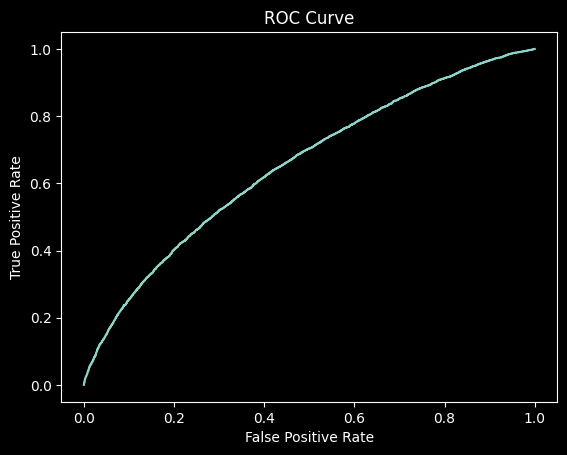

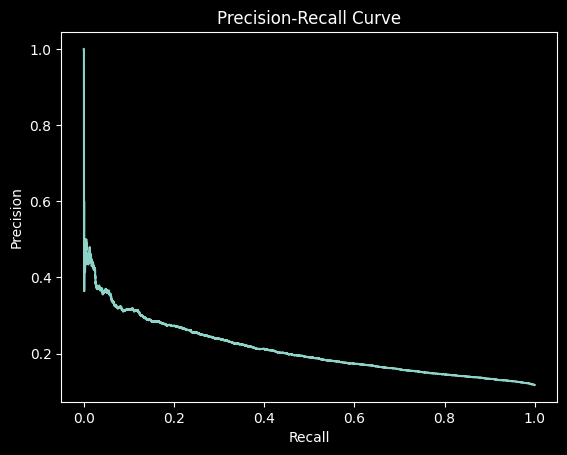

In [ ]:
fpr, tpr, _ = roc_curve(y_test_Logistic_Regression, model.predict_proba(x_test_Logistic_Regression)[:, 1])
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

precision, recall, _ = precision_recall_curve(y_test_Logistic_Regression, model.predict_proba(x_test_Logistic_Regression)[:, 1])
plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


### 1. **ROC Curve (Receiver Operating Characteristic Curve)**
- **Description**: The ROC curve plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold settings.
- **Key Observations**:
  - The curve is slightly above the diagonal line (y=x), indicating that the model performs better than random guessing.
  - The closer the curve is to the top-left corner, the better the model's performance.
  - To quantify, the **Area Under the Curve (AUC)** can be computed, which gives a single metric for model performance (values closer to 1 are ideal).

### 2. **Precision-Recall Curve**
- **Description**: This curve evaluates the trade-off between **Precision** (positive predictive value) and **Recall** (sensitivity) for different thresholds.
- **Key Observations**:
  - The curve starts at a high precision with low recall, gradually declining as recall increases.
  - A steep drop in precision as recall increases could indicate challenges in balancing false positives and false negatives.
  - For imbalanced datasets, this curve is often more insightful than the ROC curve.


___

# **Decision Tree**

In [67]:
df1.head()

City  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
134999     3   19   44795      176523          569              72   
58912      7   19   58740      124519          329              28   
36499      7   19   15000      141565          688              34   
116132     3   19   84944      225681          583             107   
61738      8   19   67400      230770          418               3   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
134999               1            11        12      0.77          1   
58912                4            11        48      0.49          1   
36499                3             4        46      0.85          2   
116132               3             9        24      0.35          2   
61738                2            13        36      0.63          0   

        EmploymentType  MaritalStatus  HasMortgage  HasDependents  \
134999               0              2            1              1   
58912                3              1            0              1   
36499                0              2            1              1   
116132               1              2            1              1   
61738                1              2            0              1   

        LoanPurpose  HasCoSigner  Default  
134999            2            0        1  
58912             4            1        0  
36499             1            1        0  
116132            0            1        0  
61738             0            0        1

In [68]:
x_Decision_Tree = df1.drop(columns='Default')
y_Decision_Tree = df1['Default']

In [69]:
x_Decision_Tree.head()

City  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
134999     3   19   44795      176523          569              72   
58912      7   19   58740      124519          329              28   
36499      7   19   15000      141565          688              34   
116132     3   19   84944      225681          583             107   
61738      8   19   67400      230770          418               3   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
134999               1            11        12      0.77          1   
58912                4            11        48      0.49          1   
36499                3             4        46      0.85          2   
116132               3             9        24      0.35          2   
61738                2            13        36      0.63          0   

        EmploymentType  MaritalStatus  HasMortgage  HasDependents  \
134999               0              2            1              1   
58912                3              1            0              1   
36499                0              2            1              1   
116132               1              2            1              1   
61738                1              2            0              1   

        LoanPurpose  HasCoSigner  
134999            2            0  
58912             4            1  
36499             1            1  
116132            0            1  
61738             0            0

In [70]:
y_Decision_Tree.head()

134999    1
58912     0
36499     0
116132    0
61738     1
Name: Default, dtype: int64

In [71]:
x_train_Decision_Tree, x_test_Decision_Tree, y_train_Decision_Tree, y_test_Decision_Tree = train_test_split(x_Decision_Tree, y_Decision_Tree, test_size=0.25, random_state=42)

print("\nx train shape: ", x_train_Decision_Tree.shape, "\nx test shape: ", x_test_Decision_Tree.shape, "\ny train shape: ", y_train_Decision_Tree.shape, "\ny test shape: ", y_test_Decision_Tree.shape)


x train shape:  (96561, 17) 
x test shape:  (32187, 17) 
y train shape:  (96561,) 
y test shape:  (32187,)


In [ ]:

Decision_Tree = DecisionTreeClassifier(random_state=101)
Decision_Tree.fit(x_train_Decision_Tree, y_train_Decision_Tree)

y_pred_Decision_Tree = Decision_Tree.predict(x_test_Decision_Tree)   

y_pred_classification_report_Decision_Tree = classification_report(y_test_Decision_Tree, y_pred_Decision_Tree)
y_pred_confusion_matrix_Decision_Tree = confusion_matrix(y_test_Decision_Tree, y_pred_Decision_Tree)
y_pred_accuracy_score_Decision_Tree = accuracy_score(y_test_Decision_Tree, y_pred_Decision_Tree)

print("Decision_Tree Classification Report:\n", y_pred_classification_report_Decision_Tree)
print("\n\nDecision_Tree Confusion Matrix:\n", y_pred_confusion_matrix_Decision_Tree)
print("\n\nDecision_Tree Accuracy Score:", round(y_pred_accuracy_score_Decision_Tree,2))

Decision_Tree Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88     28440
           1       0.17      0.20      0.18      3747

    accuracy                           0.79     32187
   macro avg       0.53      0.53      0.53     32187
weighted avg       0.81      0.79      0.80     32187



Decision_Tree Confusion Matrix:
 [[24727  3713]
 [ 3004   743]]


Decision_Tree Accuracy Score: 0.79


The Decision Tree model shows an accuracy of 79%, meaning it correctly classified 79% of the instances in the dataset.

- Precision for class 0 (negative class) is 0.89, indicating a good rate of correct predictions for this class.
- Precision for class 1 (positive class) is low at 0.17, suggesting many false positives.
- The recall for class 1 is also low at 0.20, meaning the model misses a significant portion of the positive class.
- The F1-score for class 1 is 0.18, highlighting a poor balance between precision and recall.

The confusion matrix shows that the model is biased toward predicting the negative class (0), with 3004 false negatives and 3713 false positives.


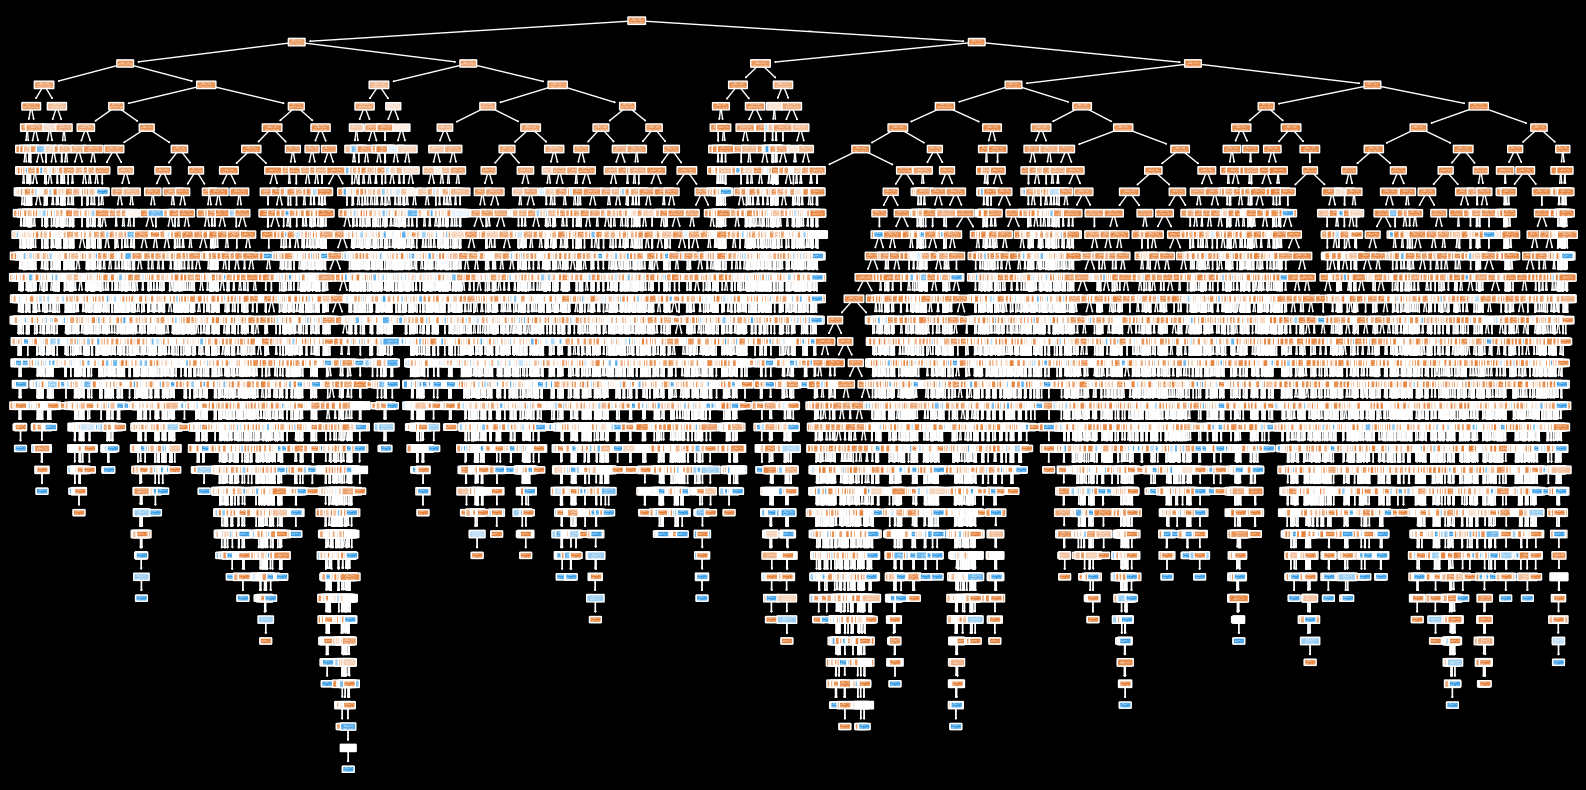

In [73]:

plt.figure(figsize=(20, 10))
plot_tree(Decision_Tree, filled=True, feature_names=x_train_Decision_Tree.columns, class_names=["Class 0", "Class 1"], rounded=True)
plt.show()


___

# **Random Forest**

In [74]:
df1.head()

City  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
134999     3   19   44795      176523          569              72   
58912      7   19   58740      124519          329              28   
36499      7   19   15000      141565          688              34   
116132     3   19   84944      225681          583             107   
61738      8   19   67400      230770          418               3   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
134999               1            11        12      0.77          1   
58912                4            11        48      0.49          1   
36499                3             4        46      0.85          2   
116132               3             9        24      0.35          2   
61738                2            13        36      0.63          0   

        EmploymentType  MaritalStatus  HasMortgage  HasDependents  \
134999               0              2            1              1   
58912                3              1            0              1   
36499                0              2            1              1   
116132               1              2            1              1   
61738                1              2            0              1   

        LoanPurpose  HasCoSigner  Default  
134999            2            0        1  
58912             4            1        0  
36499             1            1        0  
116132            0            1        0  
61738             0            0        1

In [75]:
x_Random_Forest = df1.drop(columns='Default')
y_Random_Forest = df1['Default']

In [76]:
x_Random_Forest.head()

City  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
134999     3   19   44795      176523          569              72   
58912      7   19   58740      124519          329              28   
36499      7   19   15000      141565          688              34   
116132     3   19   84944      225681          583             107   
61738      8   19   67400      230770          418               3   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
134999               1            11        12      0.77          1   
58912                4            11        48      0.49          1   
36499                3             4        46      0.85          2   
116132               3             9        24      0.35          2   
61738                2            13        36      0.63          0   

        EmploymentType  MaritalStatus  HasMortgage  HasDependents  \
134999               0              2            1              1   
58912                3              1            0              1   
36499                0              2            1              1   
116132               1              2            1              1   
61738                1              2            0              1   

        LoanPurpose  HasCoSigner  
134999            2            0  
58912             4            1  
36499             1            1  
116132            0            1  
61738             0            0

In [77]:
y_Random_Forest.head()

134999    1
58912     0
36499     0
116132    0
61738     1
Name: Default, dtype: int64

In [78]:
x_train_Random_Forest, x_test_Random_Forest, y_train_Random_Forest, y_test_Random_Forest = train_test_split(x_Random_Forest, y_Random_Forest, test_size=0.3, random_state=42)

print("\nx train shape: ", x_train_Random_Forest.shape, "\nx test shape: ", x_test_Random_Forest.shape, "\ny train shape: ", y_train_Random_Forest.shape, "\ny test shape: ", y_test_Random_Forest.shape)



x train shape:  (90123, 17) 
x test shape:  (38625, 17) 
y train shape:  (90123,) 
y test shape:  (38625,)


In [ ]:
Random_Forest = RandomForestClassifier(random_state=101)

Random_Forest.fit(x_train_Random_Forest, y_train_Random_Forest)

y_pred_Random_Forest = Random_Forest.predict(x_test_Random_Forest)

y_pred_classification_report_Random_Forest = classification_report(y_test_Random_Forest, y_pred_Random_Forest)
y_pred_confusion_matrix_Random_Forest = confusion_matrix(y_test_Random_Forest, y_pred_Random_Forest)
y_pred_accuracy_score_Random_Forest = accuracy_score(y_test_Random_Forest, y_pred_Random_Forest)

print("Random Forest Classification Report:\n", y_pred_classification_report_Random_Forest)
print("\n\nRandom Forest Confusion Matrix:\n", y_pred_confusion_matrix_Random_Forest)
print("\n\nRandom Forest Accuracy Score:", round(y_pred_accuracy_score_Random_Forest,2))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     34160
           1       0.63      0.01      0.02      4465

    accuracy                           0.88     38625
   macro avg       0.76      0.51      0.48     38625
weighted avg       0.86      0.88      0.83     38625



Random Forest Confusion Matrix:
 [[34129    31]
 [ 4412    53]]


Random Forest Accuracy Score: 0.88


The Random Forest model shows an accuracy of 88%, meaning it correctly classified 88% of the instances in the dataset.

- Precision for class 0 (negative class) is 0.89, indicating a good rate of correct predictions for this class.
- Precision for class 1 (positive class) is 0.63, which is higher than the previous models, but still suggests a high number of false positives.
- The recall for class 1 is very low at 0.01, meaning the model misses nearly all of the positive class instances.
- The F1-score for class 1 is 0.02, showing a poor balance between precision and recall.

The confusion matrix shows that the model predominantly predicts the negative class (0), with only 53 true positives and 4412 false negatives.


___

# **Best Decision Tree inRandom Forest**

In [80]:

Random_Forest = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 150, 200], 
    'max_features': ['sqrt', 'log2'],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2],  
    'bootstrap': [True, False]
}

Random_Forest_random = RandomizedSearchCV(estimator=Random_Forest,
                               param_distributions=param_grid,
                               n_iter=100, cv=3, verbose=2,
                               random_state=42, n_jobs=-1, error_score='raise')

Random_Forest_random.fit(x_train_Random_Forest, y_train_Random_Forest)
best_params = Random_Forest_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [81]:
best_params

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [82]:
best_dt = RandomForestClassifier(**best_params, random_state=101)

best_dt.fit(x_train_Random_Forest, y_train_Random_Forest)

y_pred_best_best_dt = best_dt.predict(x_test_Random_Forest)

y_pred_classification_report_Random_Forest_best = classification_report(y_test_Random_Forest, y_pred_best_best_dt)
y_pred_confusion_matrix_Random_Forest_best = confusion_matrix(y_test_Random_Forest, y_pred_best_best_dt)
y_pred_accuracy_score_Random_Forest_best = accuracy_score(y_test_Random_Forest, y_pred_best_best_dt)

print("Best Random Forest Decision Tree Classification Report:\n", y_pred_classification_report_Random_Forest_best)
print("\n\nBest Random Forest Decision Tree Confusion Matrix:\n", y_pred_confusion_matrix_Random_Forest_best)
print("\n\nBest Random Forest Decision Tree Accuracy Score:", round(y_pred_accuracy_score_Random_Forest_best,2))

Best Random Forest Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     34160
           1       0.58      0.02      0.04      4465

    accuracy                           0.89     38625
   macro avg       0.73      0.51      0.49     38625
weighted avg       0.85      0.89      0.83     38625



Best Random Forest Decision Tree Confusion Matrix:
 [[34096    64]
 [ 4376    89]]


Best Random Forest Decision Tree Accuracy Score: 0.89


The Best Random Forest Decision Tree model shows an accuracy of 89%, meaning it correctly classified 89% of the instances in the dataset.

- Precision for class 0 (negative class) is 0.89, indicating a good rate of correct predictions for this class.
- Precision for class 1 (positive class) is 0.58, suggesting a better rate of correct predictions for class 1 compared to previous models, but still with a significant number of false positives.
- The recall for class 1 is very low at 0.02, meaning the model misses nearly all of the positive class instances.
- The F1-score for class 1 is 0.04, indicating a very poor balance between precision and recall.

The confusion matrix shows that the model predominantly predicts the negative class (0), with only 89 true positives and 4376 false negatives.


___

# **SVM**

In [83]:
df1.head()

City  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
134999     3   19   44795      176523          569              72   
58912      7   19   58740      124519          329              28   
36499      7   19   15000      141565          688              34   
116132     3   19   84944      225681          583             107   
61738      8   19   67400      230770          418               3   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
134999               1            11        12      0.77          1   
58912                4            11        48      0.49          1   
36499                3             4        46      0.85          2   
116132               3             9        24      0.35          2   
61738                2            13        36      0.63          0   

        EmploymentType  MaritalStatus  HasMortgage  HasDependents  \
134999               0              2            1              1   
58912                3              1            0              1   
36499                0              2            1              1   
116132               1              2            1              1   
61738                1              2            0              1   

        LoanPurpose  HasCoSigner  Default  
134999            2            0        1  
58912             4            1        0  
36499             1            1        0  
116132            0            1        0  
61738             0            0        1

In [84]:
x_svm = df1.drop(columns='Default')
y_svm = df1['Default']

In [85]:
x_svm.head()

City  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
134999     3   19   44795      176523          569              72   
58912      7   19   58740      124519          329              28   
36499      7   19   15000      141565          688              34   
116132     3   19   84944      225681          583             107   
61738      8   19   67400      230770          418               3   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
134999               1            11        12      0.77          1   
58912                4            11        48      0.49          1   
36499                3             4        46      0.85          2   
116132               3             9        24      0.35          2   
61738                2            13        36      0.63          0   

        EmploymentType  MaritalStatus  HasMortgage  HasDependents  \
134999               0              2            1              1   
58912                3              1            0              1   
36499                0              2            1              1   
116132               1              2            1              1   
61738                1              2            0              1   

        LoanPurpose  HasCoSigner  
134999            2            0  
58912             4            1  
36499             1            1  
116132            0            1  
61738             0            0

In [86]:
y_svm.head()

134999    1
58912     0
36499     0
116132    0
61738     1
Name: Default, dtype: int64

In [87]:
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(x_svm, y_svm, test_size=0.3, random_state=42)

print("\nx train shape: ", x_train_svm.shape, "\nx test shape: ", x_test_svm.shape, "\ny train shape: ", y_train_svm.shape, "\ny test shape: ", y_test_svm.shape)



x train shape:  (90123, 17) 
x test shape:  (38625, 17) 
y train shape:  (90123,) 
y test shape:  (38625,)


In [88]:
svm = SVC(random_state=101)

svm.fit(x_train_svm, y_train_svm)

SVC(random_state=101)

In [89]:
y_pred_svm = svm.predict(x_test_svm)

In [90]:
y_pred_classification_report_svm = classification_report(y_test_svm, y_pred_svm, zero_division=0)
y_pred_confusion_matrix_svm = confusion_matrix(y_test_svm, y_pred_svm)
y_pred_accuracy_score_svm = accuracy_score(y_test_svm, y_pred_svm)

print("SVM Classification Report:\n", y_pred_classification_report_svm)
print("\n\nSVM Confusion Matrix:\n", y_pred_confusion_matrix_svm)
print("\n\nSVM Accuracy Score:", round(y_pred_accuracy_score_svm,2))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     34160
           1       0.00      0.00      0.00      4465

    accuracy                           0.88     38625
   macro avg       0.44      0.50      0.47     38625
weighted avg       0.78      0.88      0.83     38625



SVM Confusion Matrix:
 [[34160     0]
 [ 4465     0]]


SVM Accuracy Score: 0.88


The SVM model shows an accuracy of 88%, meaning it correctly classified 88% of the instances in the dataset.

- Precision for class 0 (negative class) is 0.88, indicating a good rate of correct predictions for this class.
- Precision for class 1 (positive class) is 0.00, suggesting that the model made no correct predictions for the positive class.
- The recall for class 1 is also 0.00, meaning the model missed all the positive class instances.
- The F1-score for class 1 is 0.00, indicating a complete imbalance in performance for class 1.

The confusion matrix shows that the model predicts only the negative class (0), with 4465 false negatives and no true positives for class 1.

___

# **XGBoost**

In [91]:
df1.head()

City  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
134999     3   19   44795      176523          569              72   
58912      7   19   58740      124519          329              28   
36499      7   19   15000      141565          688              34   
116132     3   19   84944      225681          583             107   
61738      8   19   67400      230770          418               3   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
134999               1            11        12      0.77          1   
58912                4            11        48      0.49          1   
36499                3             4        46      0.85          2   
116132               3             9        24      0.35          2   
61738                2            13        36      0.63          0   

        EmploymentType  MaritalStatus  HasMortgage  HasDependents  \
134999               0              2            1              1   
58912                3              1            0              1   
36499                0              2            1              1   
116132               1              2            1              1   
61738                1              2            0              1   

        LoanPurpose  HasCoSigner  Default  
134999            2            0        1  
58912             4            1        0  
36499             1            1        0  
116132            0            1        0  
61738             0            0        1

In [92]:
x_xgb = df1.drop(columns='Default')
y_xgb = df1['Default']

In [93]:
x_xgb.head()

City  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
134999     3   19   44795      176523          569              72   
58912      7   19   58740      124519          329              28   
36499      7   19   15000      141565          688              34   
116132     3   19   84944      225681          583             107   
61738      8   19   67400      230770          418               3   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
134999               1            11        12      0.77          1   
58912                4            11        48      0.49          1   
36499                3             4        46      0.85          2   
116132               3             9        24      0.35          2   
61738                2            13        36      0.63          0   

        EmploymentType  MaritalStatus  HasMortgage  HasDependents  \
134999               0              2            1              1   
58912                3              1            0              1   
36499                0              2            1              1   
116132               1              2            1              1   
61738                1              2            0              1   

        LoanPurpose  HasCoSigner  
134999            2            0  
58912             4            1  
36499             1            1  
116132            0            1  
61738             0            0

In [94]:
y_xgb.head()

134999    1
58912     0
36499     0
116132    0
61738     1
Name: Default, dtype: int64

In [95]:
x_train_xgb, x_test_xbg, y_train_xbg, y_test_xbg = train_test_split(x_xgb, y_xgb, test_size=0.2, random_state=1)

xgb = XGBClassifier()
xgb.fit(x_train_xgb, y_train_xbg)

y_pred_xbg = xgb.predict(x_test_xbg)


In [96]:
y_pred_classification_report_xbg = classification_report(y_test_xbg, y_pred_xbg, zero_division=0)
y_pred_confusion_matrix_xbg = confusion_matrix(y_test_xbg, y_pred_xbg)
y_pred_accuracy_score_xbg = accuracy_score(y_test_xbg, y_pred_xbg)

print("XGBoost Classification Report:\n", y_pred_classification_report_xbg)
print("\n\nXGBoost Confusion Matrix:\n", y_pred_confusion_matrix_xbg)
print("\n\nXGBoost Accuracy Score:", round(y_pred_accuracy_score_xbg,2))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     22867
           1       0.48      0.05      0.09      2883

    accuracy                           0.89     25750
   macro avg       0.68      0.52      0.51     25750
weighted avg       0.85      0.89      0.84     25750



XGBoost Confusion Matrix:
 [[22712   155]
 [ 2742   141]]


XGBoost Accuracy Score: 0.89


The XGBoost model shows an accuracy of 89%, meaning it correctly classified 89% of the instances in the dataset.

- Precision for class 0 (negative class) is 0.89, indicating a good rate of correct predictions for this class.
- Precision for class 1 (positive class) is 0.48, suggesting a moderate number of false positives for class 1.
- The recall for class 1 is very low at 0.05, meaning the model misses most of the positive class instances.
- The F1-score for class 1 is 0.09, highlighting a very poor balance between precision and recall.

The confusion matrix shows that the model primarily predicts the negative class (0), with 2742 false negatives and 155 false positives.


___

# **KNN**

In [97]:
df1.head()

City  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
134999     3   19   44795      176523          569              72   
58912      7   19   58740      124519          329              28   
36499      7   19   15000      141565          688              34   
116132     3   19   84944      225681          583             107   
61738      8   19   67400      230770          418               3   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
134999               1            11        12      0.77          1   
58912                4            11        48      0.49          1   
36499                3             4        46      0.85          2   
116132               3             9        24      0.35          2   
61738                2            13        36      0.63          0   

        EmploymentType  MaritalStatus  HasMortgage  HasDependents  \
134999               0              2            1              1   
58912                3              1            0              1   
36499                0              2            1              1   
116132               1              2            1              1   
61738                1              2            0              1   

        LoanPurpose  HasCoSigner  Default  
134999            2            0        1  
58912             4            1        0  
36499             1            1        0  
116132            0            1        0  
61738             0            0        1

In [98]:
x_knn = df1.drop(columns=['Default'])
y_knn = df1['Default']

In [99]:
x_knn.head()

City  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
134999     3   19   44795      176523          569              72   
58912      7   19   58740      124519          329              28   
36499      7   19   15000      141565          688              34   
116132     3   19   84944      225681          583             107   
61738      8   19   67400      230770          418               3   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
134999               1            11        12      0.77          1   
58912                4            11        48      0.49          1   
36499                3             4        46      0.85          2   
116132               3             9        24      0.35          2   
61738                2            13        36      0.63          0   

        EmploymentType  MaritalStatus  HasMortgage  HasDependents  \
134999               0              2            1              1   
58912                3              1            0              1   
36499                0              2            1              1   
116132               1              2            1              1   
61738                1              2            0              1   

        LoanPurpose  HasCoSigner  
134999            2            0  
58912             4            1  
36499             1            1  
116132            0            1  
61738             0            0

In [100]:
y_knn.head()

134999    1
58912     0
36499     0
116132    0
61738     1
Name: Default, dtype: int64

In [101]:
x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(x_knn, y_knn, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_knn)
x_test_scaled = scaler.transform(x_test_knn)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train_knn)

y_pred_knn = knn.predict(x_test_scaled)


In [102]:
y_pred_classification_report_knn = classification_report(y_test_knn, y_pred_knn, zero_division=0)
y_pred_confusion_matrix_knn = confusion_matrix(y_test_knn, y_pred_knn)
y_pred_accuracy_score_knn = accuracy_score(y_test_knn, y_pred_knn)

print("KNN Classification Report:\n", y_pred_classification_report_knn)
print("\n\nKNN Confusion Matrix:\n", y_pred_confusion_matrix_knn)
print("\n\nKNN Accuracy:", round(y_pred_accuracy_score_knn,2))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     22693
           1       0.23      0.03      0.05      3057

    accuracy                           0.87     25750
   macro avg       0.56      0.51      0.49     25750
weighted avg       0.81      0.87      0.83     25750



KNN Confusion Matrix:
 [[22378   315]
 [ 2964    93]]


KNN Accuracy: 0.87


The KNN model shows an accuracy of 87%, meaning it correctly classified 87% of the instances in the dataset.

- Precision for class 0 (negative class) is 0.88, indicating a good rate of correct predictions for this class.
- Precision for class 1 (positive class) is 0.23, suggesting a significant number of false positives for class 1.
- The recall for class 1 is very low at 0.03, meaning the model misses almost all of the positive class instances.
- The F1-score for class 1 is 0.05, showing a poor balance between precision and recall.

The confusion matrix shows that the model predicts mostly the negative class (0), with 2964 false negatives and 315 false positives.

___

# **Naive Bayes**

In [103]:
df1.head()

City  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
134999     3   19   44795      176523          569              72   
58912      7   19   58740      124519          329              28   
36499      7   19   15000      141565          688              34   
116132     3   19   84944      225681          583             107   
61738      8   19   67400      230770          418               3   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
134999               1            11        12      0.77          1   
58912                4            11        48      0.49          1   
36499                3             4        46      0.85          2   
116132               3             9        24      0.35          2   
61738                2            13        36      0.63          0   

        EmploymentType  MaritalStatus  HasMortgage  HasDependents  \
134999               0              2            1              1   
58912                3              1            0              1   
36499                0              2            1              1   
116132               1              2            1              1   
61738                1              2            0              1   

        LoanPurpose  HasCoSigner  Default  
134999            2            0        1  
58912             4            1        0  
36499             1            1        0  
116132            0            1        0  
61738             0            0        1

In [104]:
x_nb = df1.drop(columns=['Default'])
y_nb = df1['Default']

In [105]:
x_nb.head()

City  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
134999     3   19   44795      176523          569              72   
58912      7   19   58740      124519          329              28   
36499      7   19   15000      141565          688              34   
116132     3   19   84944      225681          583             107   
61738      8   19   67400      230770          418               3   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
134999               1            11        12      0.77          1   
58912                4            11        48      0.49          1   
36499                3             4        46      0.85          2   
116132               3             9        24      0.35          2   
61738                2            13        36      0.63          0   

        EmploymentType  MaritalStatus  HasMortgage  HasDependents  \
134999               0              2            1              1   
58912                3              1            0              1   
36499                0              2            1              1   
116132               1              2            1              1   
61738                1              2            0              1   

        LoanPurpose  HasCoSigner  
134999            2            0  
58912             4            1  
36499             1            1  
116132            0            1  
61738             0            0

In [106]:
y_nb.head()

134999    1
58912     0
36499     0
116132    0
61738     1
Name: Default, dtype: int64

In [107]:
x_train_nb, x_test_nb, y_train_nb, y_test_nb = train_test_split(x_nb, y_nb, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_nb_scaled = scaler.fit_transform(x_train_nb)
x_test_nb_scaled = scaler.transform(x_test_nb)

nb = GaussianNB()

nb.fit(x_train_nb_scaled, y_train_nb)


GaussianNB()

In [108]:
y_pred_nb = nb.predict(x_test_nb_scaled)
y_pred_nb[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [109]:
y_pred_classification_report_nb = classification_report(y_test_nb, y_pred_nb, zero_division=0)
y_pred_confusion_matrix_nb = confusion_matrix(y_test_nb, y_pred_nb)
y_pred_accuracy_score_nb = accuracy_score(y_test_nb, y_pred_nb)

print("Naive Bayes Classification Report:\n", y_pred_classification_report_nb)
print("\n\nNaive Bayes Confusion Matrix:\n", y_pred_confusion_matrix_nb)
print("\n\nNaive Bayes Accuracy:", round(y_pred_accuracy_score_nb,2))

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     22693
           1       0.00      0.00      0.00      3057

    accuracy                           0.88     25750
   macro avg       0.44      0.50      0.47     25750
weighted avg       0.78      0.88      0.83     25750



Naive Bayes Confusion Matrix:
 [[22693     0]
 [ 3057     0]]


Naive Bayes Accuracy: 0.88


The Naive Bayes model shows an accuracy of 88%, meaning it correctly classified 88% of the instances in the dataset.

- Precision for class 0 (negative class) is 0.88, indicating a good rate of correct predictions for this class.
- Precision for class 1 (positive class) is 0.00, suggesting that the model made no correct predictions for the positive class.
- The recall for class 1 is also 0.00, meaning the model missed all the positive class instances.
- The F1-score for class 1 is 0.00, indicating a complete imbalance in performance for class 1.

The confusion matrix shows that the model predicts only the negative class (0), with 3057 false negatives and no true positives for class 1.

___

## Now lets visualize  our model results and compare them. 

In [110]:
y_pred_classification_report_Logistic_Regression_df = pd.DataFrame(classification_report(y_test_Logistic_Regression, y_pred_Logistic_Regression, output_dict=True, zero_division=0)).T.drop(columns=['support'])

y_pred_classification_report_Decision_Tree_df = pd.DataFrame(classification_report(y_test_Decision_Tree, y_pred_Decision_Tree, output_dict=True, zero_division=0)).T.drop(columns=['support'])

y_pred_classification_report_Random_Forest_df = pd.DataFrame(classification_report(y_test_Random_Forest, y_pred_Random_Forest, output_dict=True, zero_division=0)).T.drop(columns=['support'])

y_pred_classification_report_Random_Forest_best_df = pd.DataFrame(classification_report(y_test_Random_Forest, y_pred_best_best_dt, output_dict=True, zero_division=0)).T.drop(columns=['support'])

y_pred_classification_report_svm_df = pd.DataFrame(classification_report(y_test_svm, y_pred_svm, output_dict=True, zero_division=0)).T.drop(columns=['support'])

y_pred_classification_report_xbg_df = pd.DataFrame(classification_report(y_test_xbg, y_pred_xbg, output_dict=True, zero_division=0)).T.drop(columns=['support'])

y_pred_classification_report_knn_df = pd.DataFrame(classification_report(y_test_knn, y_pred_knn, output_dict=True, zero_division=0)).T.drop(columns=['support'])

y_pred_classification_report_nb_df = pd.DataFrame(classification_report(y_test_nb, y_pred_nb, output_dict=True, zero_division=0)).T.drop(columns=['support'])


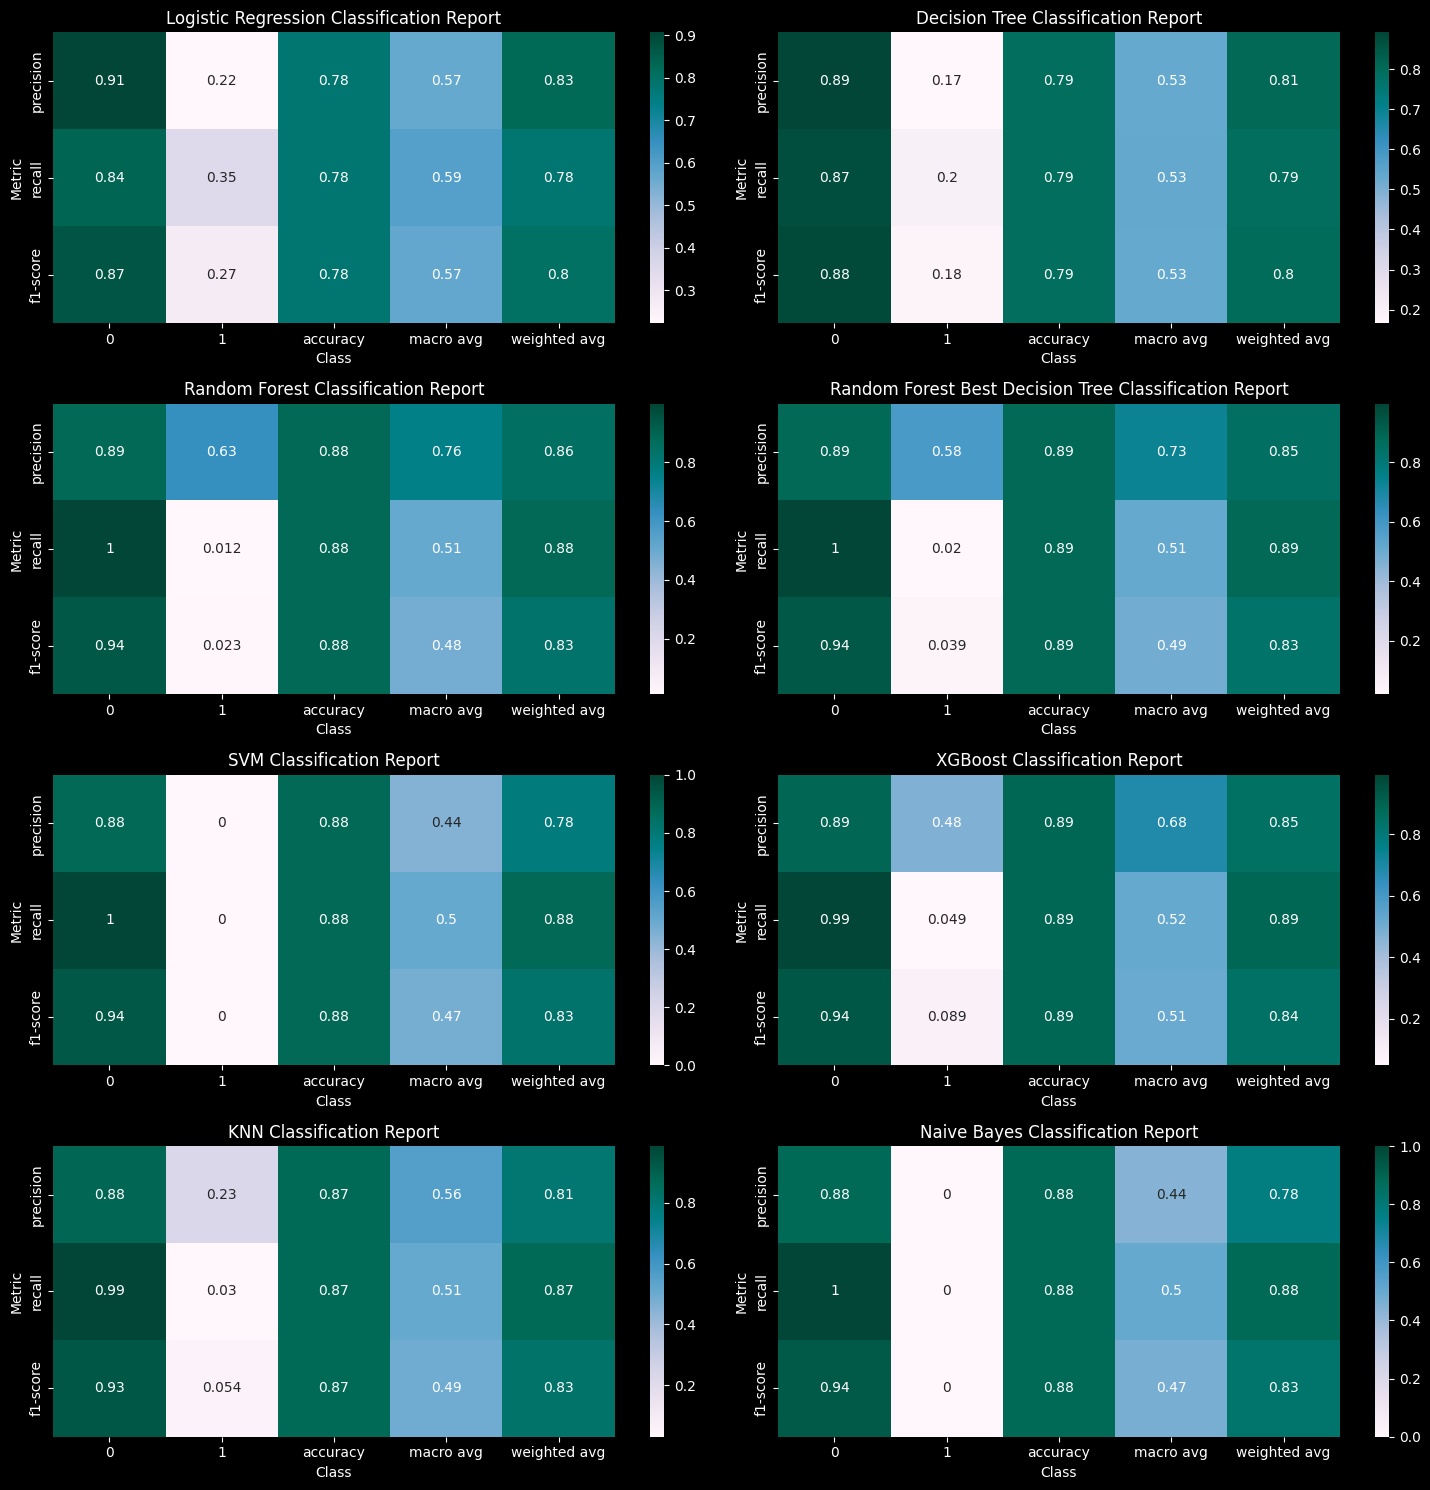

In [111]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
plt.style.use('dark_background')

sns.heatmap(y_pred_classification_report_Logistic_Regression_df.T, annot=True, cmap='PuBuGn', ax=axs[0, 0])
axs[0, 0].set_title("Logistic Regression Classification Report")
axs[0, 0].set_xlabel("Class")
axs[0, 0].set_ylabel("Metric")

sns.heatmap(y_pred_classification_report_Decision_Tree_df.T, annot=True, cmap='PuBuGn', ax=axs[0, 1])
axs[0, 1].set_title("Decision Tree Classification Report")
axs[0, 1].set_xlabel("Class")
axs[0, 1].set_ylabel("Metric")

sns.heatmap(y_pred_classification_report_Random_Forest_df.T, annot=True, cmap='PuBuGn', ax=axs[1, 0])
axs[1, 0].set_title("Random Forest Classification Report")
axs[1, 0].set_xlabel("Class")
axs[1, 0].set_ylabel("Metric")

sns.heatmap(y_pred_classification_report_Random_Forest_best_df.T, annot=True, cmap='PuBuGn', ax=axs[1, 1])
axs[1, 1].set_title("Random Forest Best Decision Tree Classification Report")
axs[1, 1].set_xlabel("Class")
axs[1, 1].set_ylabel("Metric")

sns.heatmap(y_pred_classification_report_svm_df.T, annot=True, cmap='PuBuGn', ax=axs[2, 0])
axs[2, 0].set_title("SVM Classification Report")
axs[2, 0].set_xlabel("Class")
axs[2, 0].set_ylabel("Metric")

sns.heatmap(y_pred_classification_report_xbg_df.T, annot=True, cmap='PuBuGn', ax=axs[2, 1])
axs[2, 1].set_title("XGBoost Classification Report")
axs[2, 1].set_xlabel("Class")
axs[2, 1].set_ylabel("Metric")

sns.heatmap(y_pred_classification_report_knn_df.T, annot=True, cmap='PuBuGn', ax=axs[3, 0])
axs[3, 0].set_title("KNN Classification Report")
axs[3, 0].set_xlabel("Class")
axs[3, 0].set_ylabel("Metric")

sns.heatmap(y_pred_classification_report_nb_df.T, annot=True, cmap='PuBuGn', ax=axs[3, 1])
axs[3, 1].set_title("Naive Bayes Classification Report")
axs[3, 1].set_xlabel("Class")
axs[3, 1].set_ylabel("Metric")


plt.tight_layout()

plt.show()

1. Logistic Regression:
   - The model is biased toward predicting the negative class (0), as seen from the confusion matrix. 
   - It has 2940 false negatives and 5554 false positives, indicating it frequently misclassifies positive class instances as negative.

2. Decision Tree:
   - The model also predicts the negative class (0) more frequently, with 3004 false negatives and 3713 false positives.
   - It misses a significant portion of the positive class instances, showing a bias toward classifying most instances as negative.

3. Random Forest:
   - The model predominantly predicts the negative class (0), with 4412 false negatives and only 53 true positives.
   - This shows that the model fails to correctly classify positive class instances, making it heavily biased toward the negative class.

4. Best Random Forest Decision Tree:
   - Like the other models, it primarily predicts the negative class (0), with 4376 false negatives and 89 true positives for the positive class.
   - The model misses most of the positive class instances, further confirming its bias toward the negative class.

5. SVM:
   - The model predicts only the negative class (0), with 4465 false negatives and no true positives for class 1.
   - It is entirely biased toward classifying all instances as negative, completely failing to predict positive class instances.

6. XGBoost:
   - The model primarily predicts the negative class (0), with 2742 false negatives and 155 false positives.
   - While it shows better performance than SVM, it still misses a large number of positive class instances.

7. KNN:
   - The model is also biased toward predicting the negative class (0), with 2964 false negatives and 315 false positives.
   - It misses most positive class instances, highlighting its poor performance in detecting the positive class.

8. Naive Bayes:
   - Similar to SVM, the model predicts only the negative class (0), with 3057 false negatives and no true positives for class 1.
   - The model entirely fails to predict positive class instances, reflecting a complete imbalance in performance.


___

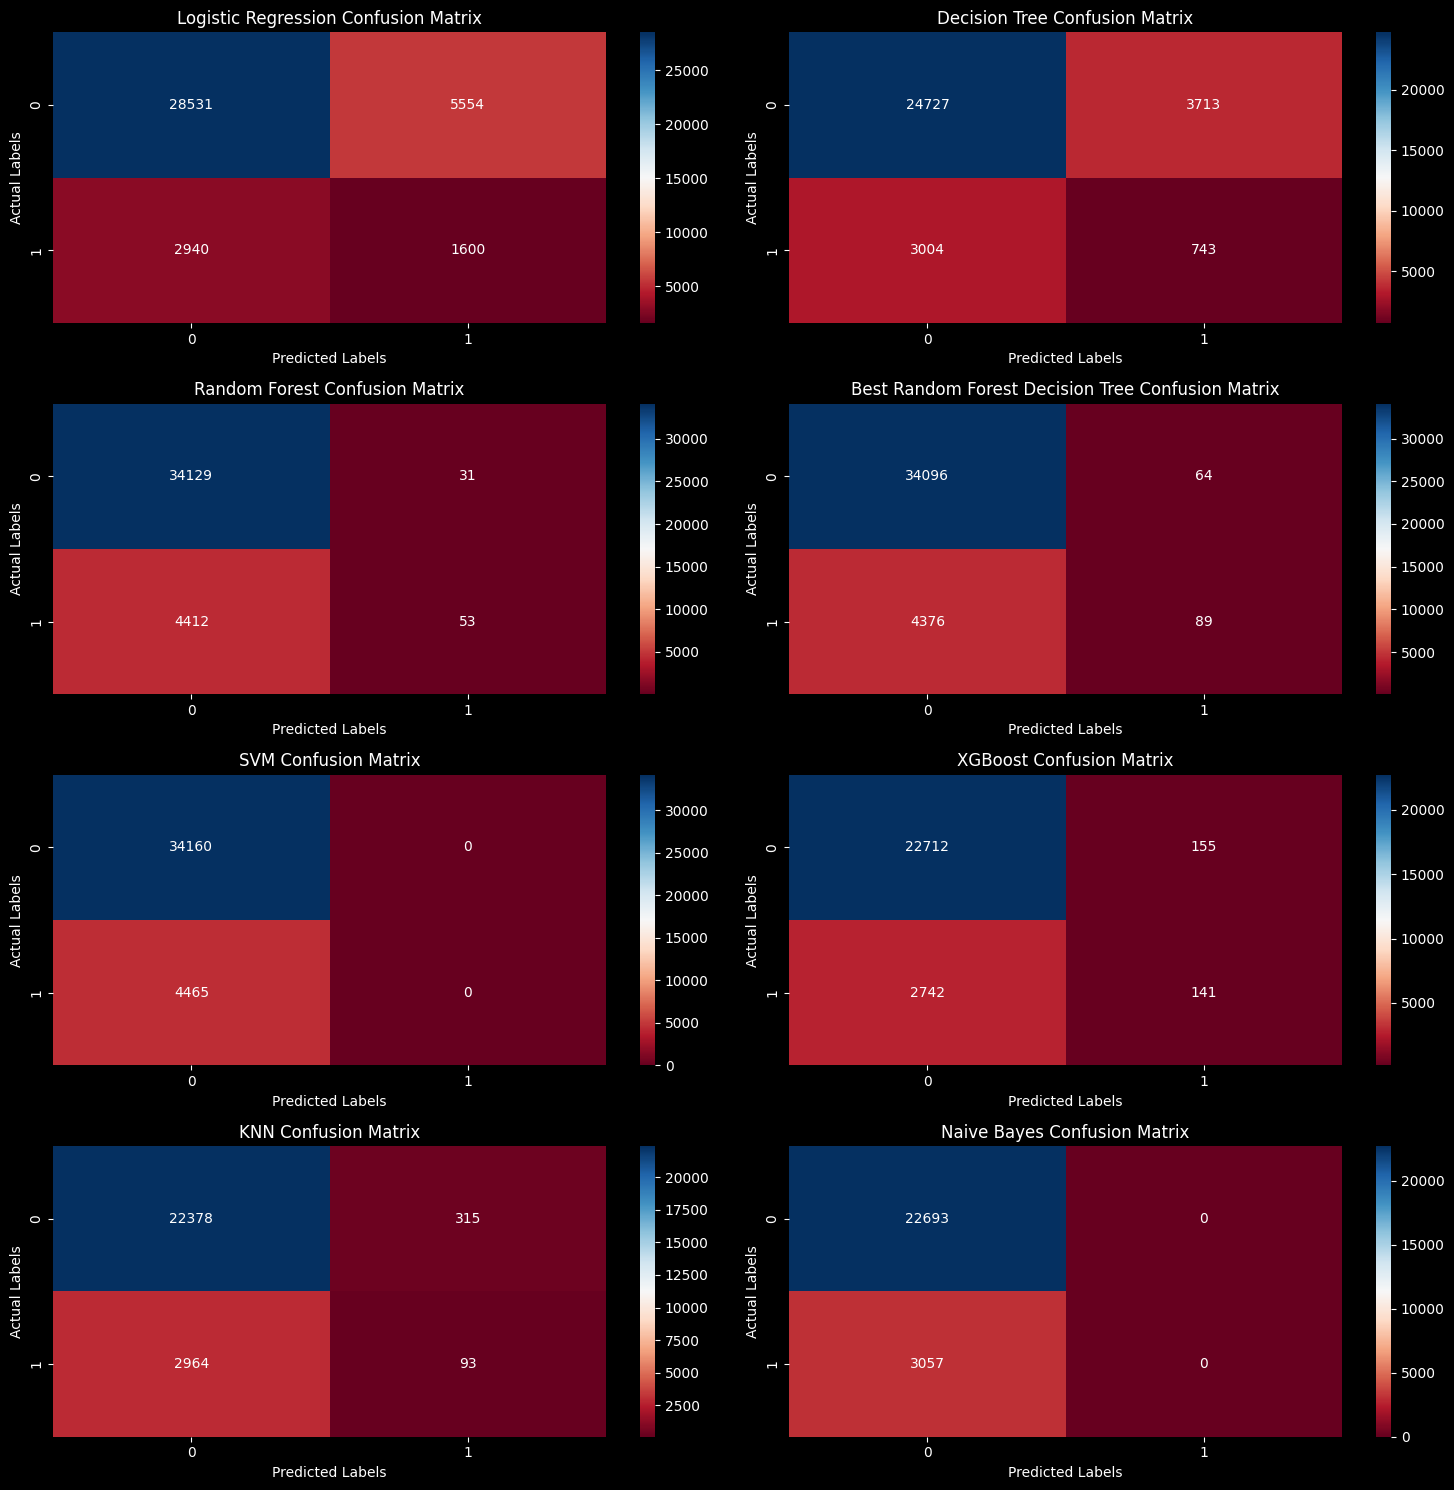

In [112]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))

sns.heatmap(y_pred_confusion_matrix_Logistic_Regression, annot=True, cmap='RdBu', fmt='d', ax=axs[0, 0])
axs[0, 0].set_xlabel('Predicted Labels')
axs[0, 0].set_ylabel('Actual Labels')
axs[0, 0].set_title('Logistic Regression Confusion Matrix')

sns.heatmap(y_pred_confusion_matrix_Decision_Tree, annot=True, cmap='RdBu', fmt='d', ax=axs[0, 1])
axs[0, 1].set_xlabel('Predicted Labels')
axs[0, 1].set_ylabel('Actual Labels')
axs[0, 1].set_title('Decision Tree Confusion Matrix')

sns.heatmap(y_pred_confusion_matrix_Random_Forest, annot=True, cmap='RdBu', fmt='d', ax=axs[1, 0])
axs[1, 0].set_xlabel('Predicted Labels')
axs[1, 0].set_ylabel('Actual Labels')
axs[1, 0].set_title('Random Forest Confusion Matrix')

sns.heatmap(y_pred_confusion_matrix_Random_Forest_best, annot=True, cmap='RdBu', fmt='d', ax=axs[1, 1])
axs[1, 1].set_xlabel('Predicted Labels')
axs[1, 1].set_ylabel('Actual Labels')
axs[1, 1].set_title('Best Random Forest Decision Tree Confusion Matrix')

sns.heatmap(y_pred_confusion_matrix_svm, annot=True, cmap='RdBu', fmt='d', ax=axs[2, 0])
axs[2, 0].set_xlabel('Predicted Labels')
axs[2, 0].set_ylabel('Actual Labels')
axs[2, 0].set_title('SVM Confusion Matrix')

sns.heatmap(y_pred_confusion_matrix_xbg, annot=True, cmap='RdBu', fmt='d', ax=axs[2, 1])
axs[2, 1].set_xlabel('Predicted Labels')
axs[2, 1].set_ylabel('Actual Labels')
axs[2, 1].set_title('XGBoost Confusion Matrix')

sns.heatmap(y_pred_confusion_matrix_knn, annot=True, cmap='RdBu', fmt='d', ax=axs[3, 0])
axs[3, 0].set_xlabel('Predicted Labels')
axs[3, 0].set_ylabel('Actual Labels')
axs[3, 0].set_title('KNN Confusion Matrix')

sns.heatmap(y_pred_confusion_matrix_nb, annot=True, cmap='RdBu', fmt='d', ax=axs[3, 1])
axs[3, 1].set_xlabel('Predicted Labels')
axs[3, 1].set_ylabel('Actual Labels')
axs[3, 1].set_title('Naive Bayes Confusion Matrix')

plt.tight_layout()
plt.show()

1. **Logistic Regression**:
   - **Confusion Matrix**: The model has a considerable number of false positives (5554) and false negatives (2940). It is biased toward the negative class (0), but still manages to classify some positive class (1) instances.
   - **Comparison**: While it misses a large portion of the positive class, the false positive rate is still relatively high.

2. **Decision Tree**:
   - **Confusion Matrix**: The Decision Tree model exhibits a similar bias toward predicting the negative class (0), with 3713 false positives and 3004 false negatives. 
   - **Comparison**: Like Logistic Regression, it fails to classify the positive class accurately, though it has fewer false positives.

3. **Random Forest**:
   - **Confusion Matrix**: The model heavily predicts the negative class (0), with only 53 true positives and a large number of false negatives (4412).
   - **Comparison**: This model is much more biased compared to Logistic Regression and Decision Tree, with a strikingly high number of false negatives.

4. **Best Random Forest Decision Tree**:
   - **Confusion Matrix**: Similar to Random Forest, this model predicts the negative class (0) most of the time, with 4376 false negatives and 89 true positives.
   - **Comparison**: The bias toward the negative class persists, and while there are more true positives than in Random Forest, the model still struggles with predicting the positive class.

5. **SVM**:
   - **Confusion Matrix**: The SVM model entirely fails to predict positive class instances, with 4465 false negatives and no true positives for class 1.
   - **Comparison**: This model shows the worst performance, as it does not correctly predict any positive class instances at all, unlike the other models.

6. **XGBoost**:
   - **Confusion Matrix**: The XGBoost model has 2742 false negatives and 155 false positives. It is still biased toward the negative class (0), but slightly better at predicting the positive class compared to SVM.
   - **Comparison**: Though better than SVM, the model still struggles with detecting the positive class, highlighting its weak performance in class 1 prediction.

7. **KNN**:
   - **Confusion Matrix**: The KNN model has 2964 false negatives and 315 false positives, similar to Logistic Regression and Decision Tree. It has a moderate number of false positives but still largely misses the positive class.
   - **Comparison**: KNN performs slightly better than SVM in terms of positive class prediction but still shows a high rate of false negatives.

8. **Naive Bayes**:
   - **Confusion Matrix**: Like SVM, the Naive Bayes model shows no true positives for class 1, with 3057 false negatives.
   - **Comparison**: The Naive Bayes model, similar to SVM, entirely fails to detect positive class instances, showing complete imbalance in its predictions.

### **Overall Comparison**:
- **Bias Toward Negative Class (0)**: All models, except for SVM and Naive Bayes, show a strong bias toward predicting the negative class (0). 
- **Failure to Detect Positive Class (1)**: Most models have a low number of true positives for class 1, with **Random Forest**, **Best Random Forest Decision Tree**, and **XGBoost** missing a large proportion of the positive class (1).
- **Worst Performance**: SVM and Naive Bayes show the poorest performance with no correct predictions for class 1. 
- **Better Performance**: **Logistic Regression** and **Decision Tree** have a better balance, showing some ability to predict the positive class, though with significant room for improvement.


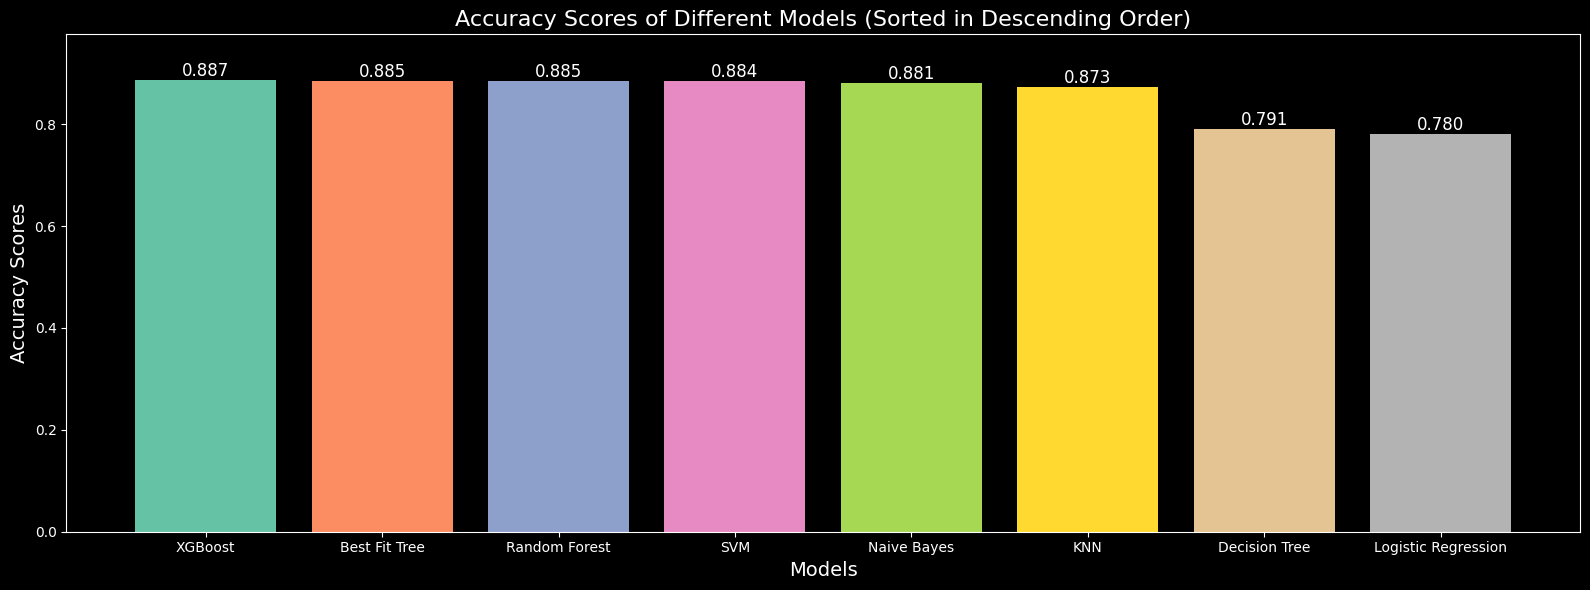

In [ ]:
models = [
    'Logistic Regression', 
    'Decision Tree', 
    'Random Forest', 
    'Best Fit Tree', 
    'SVM', 
    'XGBoost',
    'KNN', 
    'Naive Bayes'
]

accuracy_scores = [
    y_pred_accuracy_score_Logistic_Regression, 
    y_pred_accuracy_score_Decision_Tree, 
    y_pred_accuracy_score_Random_Forest, 
    y_pred_accuracy_score_Random_Forest_best, 
    y_pred_accuracy_score_svm, 
    y_pred_accuracy_score_xbg, 
    y_pred_accuracy_score_knn, 
    y_pred_accuracy_score_nb
]

sorted_pairs = sorted(zip(accuracy_scores, models), reverse=True)
sorted_accuracy_scores, sorted_models = zip(*sorted_pairs)

palette = sns.color_palette("Set2", len(sorted_models))
colors = palette.as_hex()

plt.figure(figsize=(16, 6))
plt.style.use('dark_background')

bars = plt.bar(
    sorted_models, 
    sorted_accuracy_scores, 
    color=colors
)

for bar, score in zip(bars, sorted_accuracy_scores):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(),                 
        f'{score:.3f}',        
        ha='center', va='bottom',       
        fontsize=12, 
        color='white'                    
    )

plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy Scores', fontsize=14)
plt.title('Accuracy Scores of Different Models (Sorted in Descending Order)', fontsize=16)
plt.xticks(rotation=0, ha='center')
plt.ylim(0, max(sorted_accuracy_scores) * 1.1)
plt.tight_layout()
plt.show()


1. **Logistic Regression**:
   - **Accuracy**: 78%
   - **Interpretation**: Logistic Regression has an accuracy of 78%, meaning it correctly classifies 78% of the instances. While this is a decent score, it is affected by the model's bias toward the negative class (0), as reflected in the confusion matrix.
   - **Comparison**: The accuracy is slightly lower compared to some other models, indicating it struggles with detecting the positive class (1).

2. **Decision Tree**:
   - **Accuracy**: 79%
   - **Interpretation**: The Decision Tree model performs slightly better than Logistic Regression, with 79% accuracy. Like Logistic Regression, it is biased toward predicting the negative class.
   - **Comparison**: It performs similarly to Logistic Regression but with a marginal increase in accuracy. This model also misses many positive class instances.

3. **Random Forest**:
   - **Accuracy**: 88%
   - **Interpretation**: The Random Forest model has an accuracy of 88%, which is significantly higher than both Logistic Regression and Decision Tree. However, its high accuracy is driven by the model's bias toward predicting the negative class, leading to poor performance in detecting positive class instances.
   - **Comparison**: Random Forest is one of the top-performing models in terms of accuracy, but the model's performance is skewed due to its failure to predict positive class instances accurately.

4. **Best Random Forest Decision Tree**:
   - **Accuracy**: 89%
   - **Interpretation**: This model has the highest accuracy at 89%, indicating it is the most successful in terms of overall classification. However, the model still suffers from the same bias toward the negative class, as reflected in the confusion matrix.
   - **Comparison**: The **Best Random Forest Decision Tree** model performs slightly better than **Random Forest** in terms of accuracy, but its high accuracy is still influenced by its tendency to predict the negative class predominantly.

5. **SVM**:
   - **Accuracy**: 88%
   - **Interpretation**: The SVM model achieves 88% accuracy, but it performs poorly with respect to the positive class (1), as it only predicts the negative class (0). This accuracy is likely skewed due to the model's complete failure to predict the positive class.
   - **Comparison**: SVM's accuracy is on par with **Random Forest** and **Best Random Forest Decision Tree**, but its effectiveness is compromised by the inability to detect the positive class.

6. **XGBoost**:
   - **Accuracy**: 89%
   - **Interpretation**: XGBoost also has 89% accuracy, similar to the **Best Random Forest Decision Tree**. While its accuracy is good, the model misses most of the positive class instances, which suggests its predictions are predominantly focused on the negative class.
   - **Comparison**: XGBoost has the same accuracy as the **Best Random Forest Decision Tree** model but struggles with correctly classifying the positive class.

7. **KNN**:
   - **Accuracy**: 87%
   - **Interpretation**: The KNN model has an accuracy of 87%. It performs slightly worse than **Random Forest**, **Best Random Forest Decision Tree**, and **XGBoost**, mainly due to its inability to correctly predict many of the positive class instances.
   - **Comparison**: KNN performs well overall, but it lags behind in accuracy when compared to the models with higher performance like **Random Forest** and **XGBoost**.

8. **Naive Bayes**:
   - **Accuracy**: 88%
   - **Interpretation**: Naive Bayes has an accuracy of 88%, similar to **Random Forest**, **SVM**, and **XGBoost**. However, its performance is heavily biased toward the negative class, as it fails to detect any positive class instances.
   - **Comparison**: The accuracy is high, but the model's failure to predict positive class instances makes it less useful despite the decent score.

### **Overall Comparison**:
- **Best Models by Accuracy**: **Best Random Forest Decision Tree** and **XGBoost** lead with an accuracy of 89%, closely followed by **SVM**, **Random Forest**, and **Naive Bayes** at 88%. These models have good overall accuracy but struggle to predict the positive class effectively.
- **Lowest Accuracy**: **KNN** has the lowest accuracy at 87%, showing that it performs worse than the other models, especially in terms of correctly predicting the positive class.
- **Accuracy Bias**: High accuracy in these models is often driven by the strong bias toward predicting the negative class (0), as indicated by the confusion matrices. This suggests that the models are not equally effective at predicting both classes, especially the positive class (1).

___

Now lets work with a bit unsurpvised learning.

# **K-Means Clustering**

In [114]:
df1.head()

City  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
134999     3   19   44795      176523          569              72   
58912      7   19   58740      124519          329              28   
36499      7   19   15000      141565          688              34   
116132     3   19   84944      225681          583             107   
61738      8   19   67400      230770          418               3   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
134999               1            11        12      0.77          1   
58912                4            11        48      0.49          1   
36499                3             4        46      0.85          2   
116132               3             9        24      0.35          2   
61738                2            13        36      0.63          0   

        EmploymentType  MaritalStatus  HasMortgage  HasDependents  \
134999               0              2            1              1   
58912                3              1            0              1   
36499                0              2            1              1   
116132               1              2            1              1   
61738                1              2            0              1   

        LoanPurpose  HasCoSigner  Default  
134999            2            0        1  
58912             4            1        0  
36499             1            1        0  
116132            0            1        0  
61738             0            0        1

In [115]:
x_kmc = df1.drop(columns='Default')
y_kmc = df1['Default']

In [116]:
x_kmc.head()

City  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
134999     3   19   44795      176523          569              72   
58912      7   19   58740      124519          329              28   
36499      7   19   15000      141565          688              34   
116132     3   19   84944      225681          583             107   
61738      8   19   67400      230770          418               3   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
134999               1            11        12      0.77          1   
58912                4            11        48      0.49          1   
36499                3             4        46      0.85          2   
116132               3             9        24      0.35          2   
61738                2            13        36      0.63          0   

        EmploymentType  MaritalStatus  HasMortgage  HasDependents  \
134999               0              2            1              1   
58912                3              1            0              1   
36499                0              2            1              1   
116132               1              2            1              1   
61738                1              2            0              1   

        LoanPurpose  HasCoSigner  
134999            2            0  
58912             4            1  
36499             1            1  
116132            0            1  
61738             0            0

In [ ]:
x_train_kmc, x_test_kmc = train_test_split(x_kmc, test_size=0.3, random_state=101)

scaler = StandardScaler()
x_train_kmc_scaled = scaler.fit_transform(x_train_kmc)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(x_train_kmc_scaled)

y_pred_kmeans = kmeans.predict(x_train_kmc_scaled)

silhouette_avg = silhouette_score(x_train_kmc_scaled, y_pred_kmeans)
print("Silhouette Score for K-Means clustering:", silhouette_avg)

Silhouette Score for K-Means clustering: 0.03538526273319647


In [118]:
y_pred_kmeans[:10]


array([2, 4, 1, 4, 2, 1, 4, 1, 3, 0], dtype=int32)

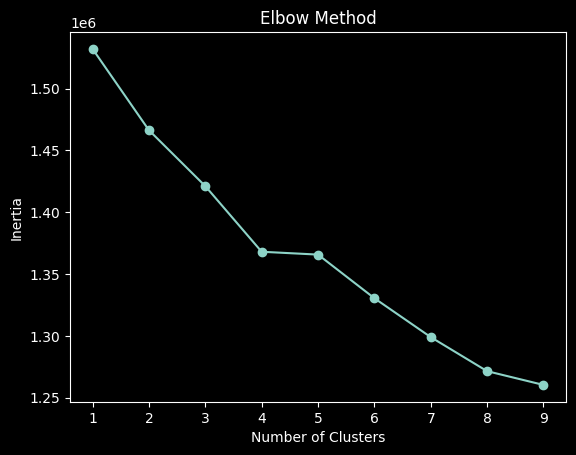

In [ ]:
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x_train_kmc_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [120]:
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[-4.63263429e-03  1.44339819e-02  8.97281689e-01 -3.57245478e-02
  -3.68696325e-01 -1.61191179e-02 -1.30975253e-01 -5.13009823e-02
   1.24558106e-01  1.90461153e-02 -8.31308792e-01 -1.12172632e-01
   3.50581969e-01 -4.97834968e-02  2.43755372e-03 -1.42716418e-01
  -1.07482774e-01]
 [-1.07747089e-02 -5.73733586e-03 -8.61695181e-01  2.23477970e-02
  -8.22857112e-01  6.11790180e-02  4.19654343e-03 -5.75448189e-02
  -1.08778547e-02  2.60308080e-02  1.06549015e-01 -3.29159081e-02
   6.29399107e-01  2.97024353e-02 -2.70490129e-02 -4.09697139e-02
   5.19008537e-02]
 [-8.30577261e-03 -2.21644365e-02  3.11749322e-01  3.73930666e-02
  -3.07329337e-01 -1.02485597e-02  1.09414518e-01  3.31778317e-02
  -1.32490555e-01  5.62299574e-03  8.25240641e-01  1.12421804e-01
  -1.00499188e+00  1.25985571e-04  2.82362942e-02  7.20503220e-02
   1.25594283e-02]
 [-2.68344939e-02 -4.65910549e-03  1.61408569e-01  9.21079181e-03
   8.43202553e-01 -4.91952226e-02 -4.62598168e-02  1.16953283e-02
  

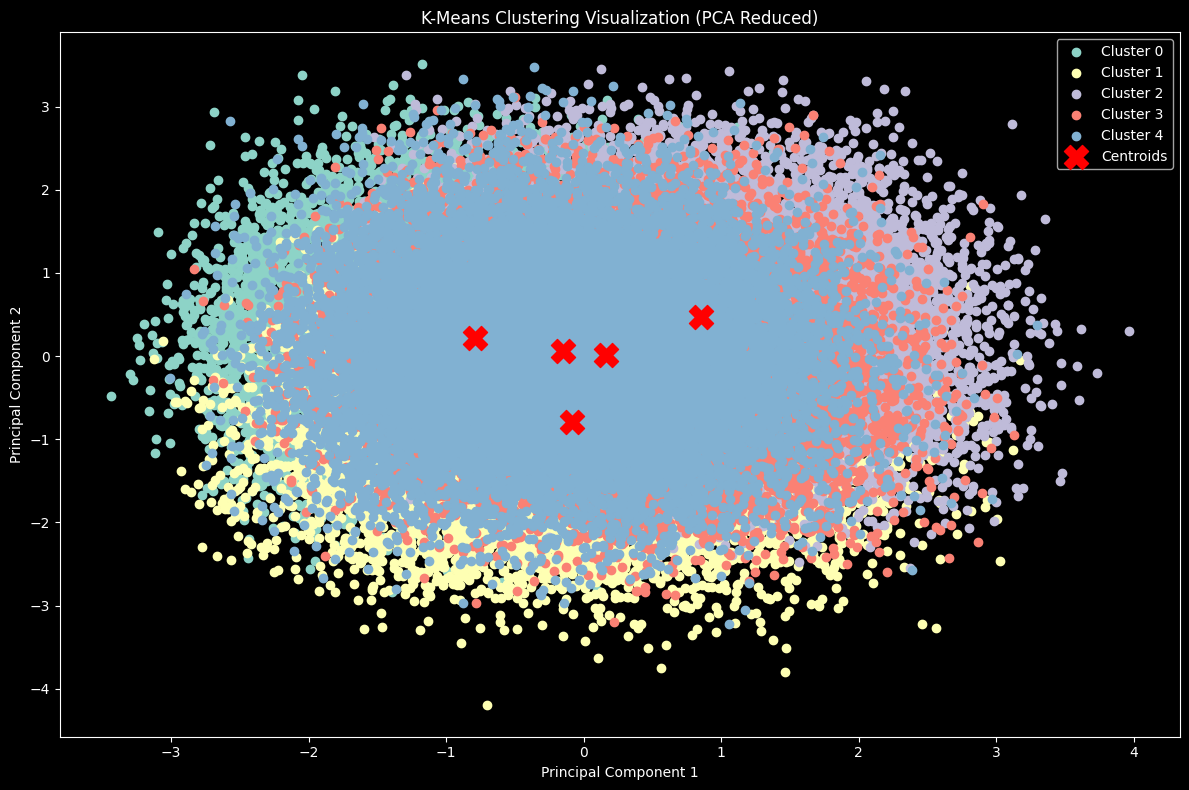

In [ ]:
pca = PCA(n_components=2)
x_train_kmc_pca = pca.fit_transform(x_train_kmc_scaled)

plt.figure(figsize=(12, 8))
for cluster in range(kmeans.n_clusters):
    plt.scatter(
        x_train_kmc_pca[y_pred_kmeans == cluster, 0], 
        x_train_kmc_pca[y_pred_kmeans == cluster, 1], 
        label=f'Cluster {cluster}'
    )

centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('K-Means Clustering Visualization (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.tight_layout()
plt.show()

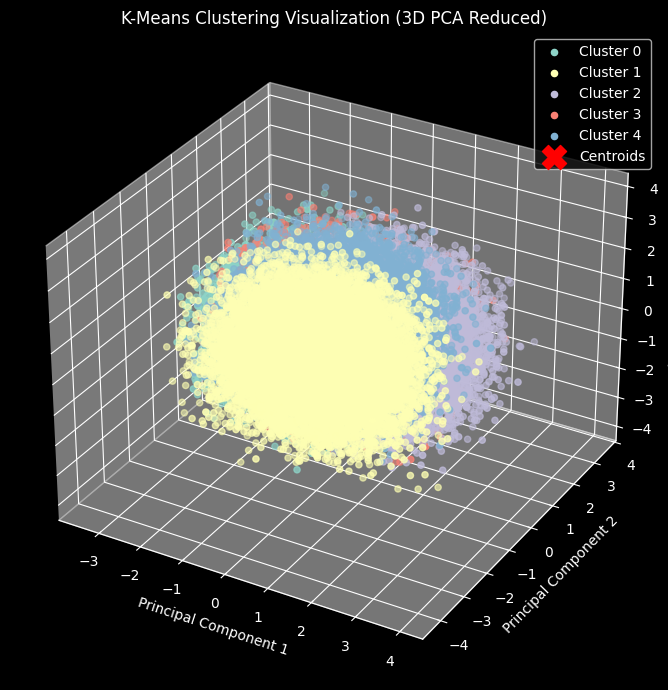

In [ ]:
pca = PCA(n_components=3)
x_train_kmc_pca_3d = pca.fit_transform(x_train_kmc_scaled)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(kmeans.n_clusters):
    ax.scatter(
        x_train_kmc_pca_3d[y_pred_kmeans == cluster, 0], 
        x_train_kmc_pca_3d[y_pred_kmeans == cluster, 1], 
        x_train_kmc_pca_3d[y_pred_kmeans == cluster, 2], 
        label=f'Cluster {cluster}'
    )

centroids_3d = pca.transform(kmeans.cluster_centers_)
ax.scatter(centroids_3d[:, 0], centroids_3d[:, 1], centroids_3d[:, 2], 
           s=300, c='red', marker='X', label='Centroids')

ax.set_title('K-Means Clustering Visualization (3D PCA Reduced)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.tight_layout()
plt.show()


In [130]:
pio.renderers.default = 'browser'

pca = PCA(n_components=3)
x_train_kmc_pca_3d = pca.fit_transform(x_train_kmc_scaled)

centroids_3d = pca.transform(kmeans.cluster_centers_)

fig = go.Figure()

for cluster in range(kmeans.n_clusters):
    fig.add_trace(go.Scatter3d(
        x=x_train_kmc_pca_3d[y_pred_kmeans == cluster, 0],
        y=x_train_kmc_pca_3d[y_pred_kmeans == cluster, 1],
        z=x_train_kmc_pca_3d[y_pred_kmeans == cluster, 2],
        mode='markers',
        marker=dict(size=5),
        name=f'Cluster {cluster}'
    ))

fig.add_trace(go.Scatter3d(
    x=centroids_3d[:, 0],
    y=centroids_3d[:, 1],
    z=centroids_3d[:, 2],
    mode='markers',
    marker=dict(size=10, color='red', symbol='x'),
    name='Centroids'
))

fig.update_layout(
    title='K-Means Clustering Visualization (3D PCA Reduced)',
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3'
    ),
    legend=dict(
        x=0.8, y=0.9
    )
)

fig.show()


___

# **Hierarchical Clustering**

In [124]:
df1.head()

City  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
134999     3   19   44795      176523          569              72   
58912      7   19   58740      124519          329              28   
36499      7   19   15000      141565          688              34   
116132     3   19   84944      225681          583             107   
61738      8   19   67400      230770          418               3   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
134999               1            11        12      0.77          1   
58912                4            11        48      0.49          1   
36499                3             4        46      0.85          2   
116132               3             9        24      0.35          2   
61738                2            13        36      0.63          0   

        EmploymentType  MaritalStatus  HasMortgage  HasDependents  \
134999               0              2            1              1   
58912                3              1            0              1   
36499                0              2            1              1   
116132               1              2            1              1   
61738                1              2            0              1   

        LoanPurpose  HasCoSigner  Default  
134999            2            0        1  
58912             4            1        0  
36499             1            1        0  
116132            0            1        0  
61738             0            0        1

In [125]:
x_hc = df1.drop(columns='Default')

In [126]:
x_hc.head()

City  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
134999     3   19   44795      176523          569              72   
58912      7   19   58740      124519          329              28   
36499      7   19   15000      141565          688              34   
116132     3   19   84944      225681          583             107   
61738      8   19   67400      230770          418               3   

        NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
134999               1            11        12      0.77          1   
58912                4            11        48      0.49          1   
36499                3             4        46      0.85          2   
116132               3             9        24      0.35          2   
61738                2            13        36      0.63          0   

        EmploymentType  MaritalStatus  HasMortgage  HasDependents  \
134999               0              2            1              1   
58912                3              1            0              1   
36499                0              2            1              1   
116132               1              2            1              1   
61738                1              2            0              1   

        LoanPurpose  HasCoSigner  
134999            2            0  
58912             4            1  
36499             1            1  
116132            0            1  
61738             0            0

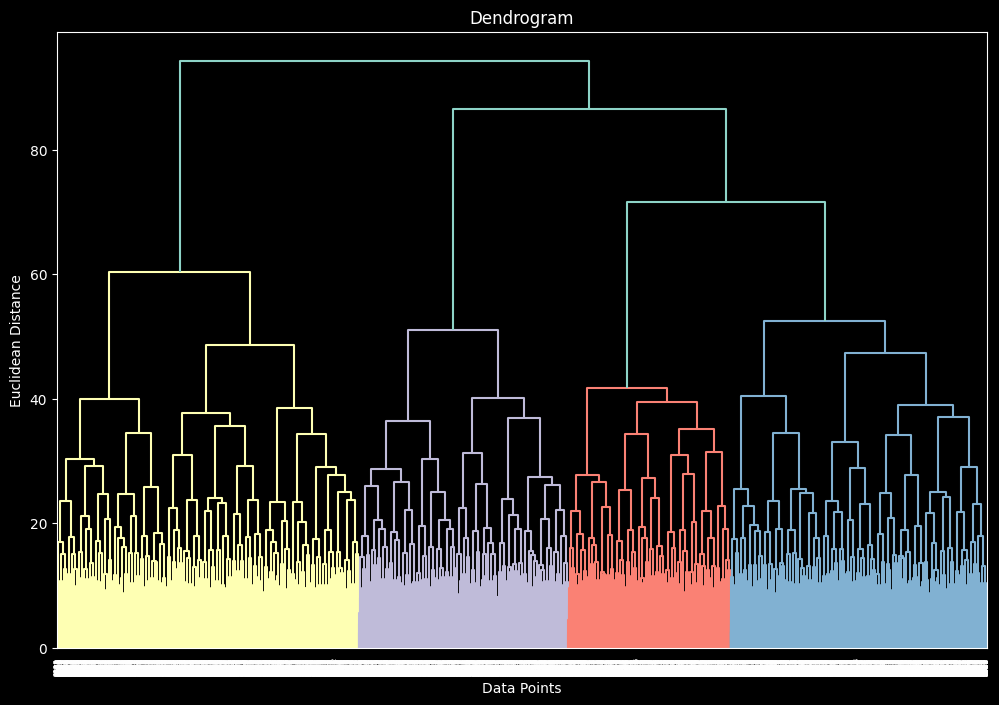

In [131]:
x_hc_sampled = x_hc.sample(n=10000, random_state=42)
x_hc_scaled = scaler.fit_transform(x_hc_sampled)

linked = linkage(x_hc_scaled, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


In [132]:
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(x_hc_scaled)

In [134]:
df2 = df1.sample(n=10000, random_state=42)
df2['Cluster'] = y_hc

In [135]:
pca = PCA(n_components=2)
x_hc_pca = pca.fit_transform(x_hc_scaled)

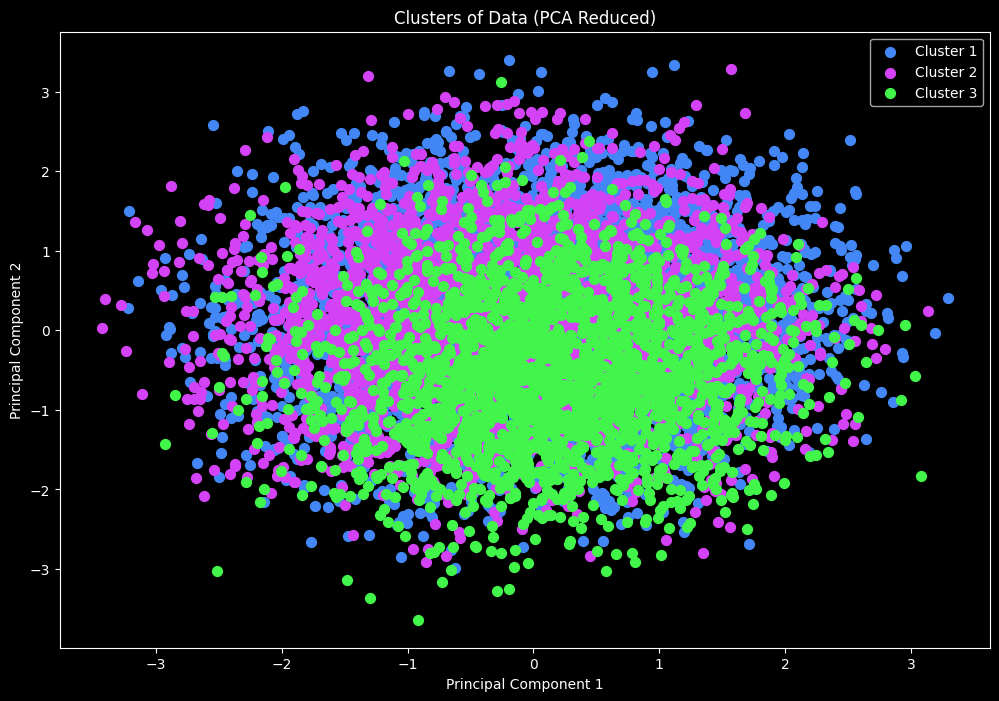

In [136]:
plt.figure(figsize=(12, 8))
plt.scatter(x_hc_pca[y_hc == 0, 0], x_hc_pca[y_hc == 0, 1], s=50, c='#4287f5', label='Cluster 1')
plt.scatter(x_hc_pca[y_hc == 1, 0], x_hc_pca[y_hc == 1, 1], s=50, c='#d442f5', label='Cluster 2')
plt.scatter(x_hc_pca[y_hc == 2, 0], x_hc_pca[y_hc == 2, 1], s=50, c='#42f54b', label='Cluster 3')
plt.title('Clusters of Data (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

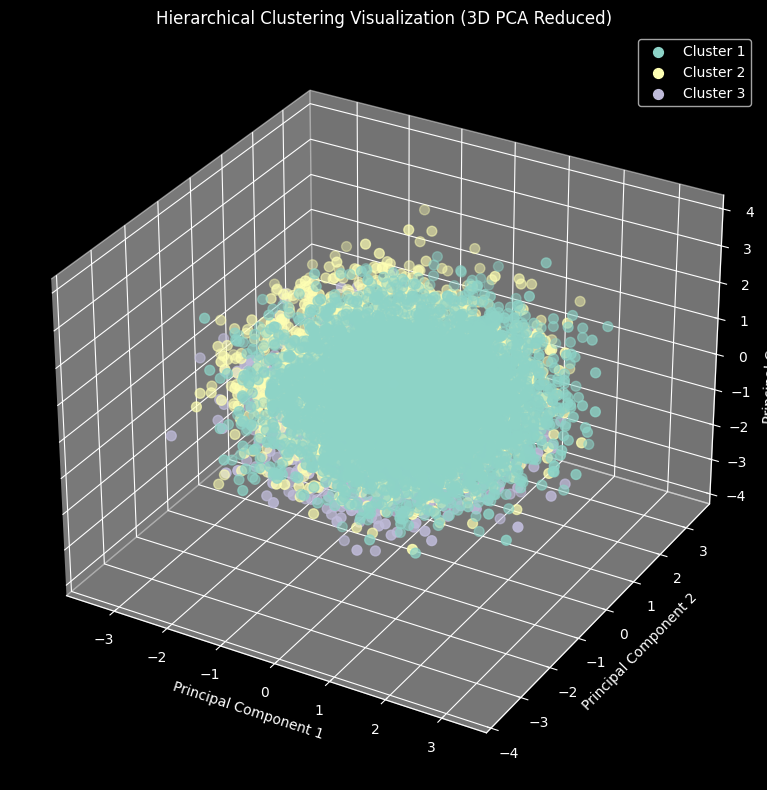

In [ ]:
pca = PCA(n_components=3)
x_hc_pca_3d = pca.fit_transform(x_hc_scaled)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(3):
    ax.scatter(
        x_hc_pca_3d[y_hc == cluster, 0],
        x_hc_pca_3d[y_hc == cluster, 1],
        x_hc_pca_3d[y_hc == cluster, 2],
        label=f'Cluster {cluster + 1}',
        s=50
    )

ax.set_title('Hierarchical Clustering Visualization (3D PCA Reduced)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.tight_layout()
plt.show()


In [138]:
pca = PCA(n_components=3)
x_hc_pca_3d = pca.fit_transform(x_hc_scaled)

fig = go.Figure()

for cluster in range(3):
    fig.add_trace(go.Scatter3d(
        x=x_hc_pca_3d[y_hc == cluster, 0],
        y=x_hc_pca_3d[y_hc == cluster, 1],
        z=x_hc_pca_3d[y_hc == cluster, 2],
        mode='markers',
        marker=dict(size=5),
        name=f'Cluster {cluster + 1}'
    ))

fig.update_layout(
    title='Hierarchical Clustering Visualization (3D PCA Reduced)',
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3'
    ),
    legend=dict(
        x=0.8, y=0.9
    )
)

fig.show()

In [ ]:
silhouette_avg = silhouette_score(x_hc_scaled, y_hc)
print("Hierarchical Clustering Silhouette Score:", silhouette_avg)

Silhouette Score: 0.019174360860774183


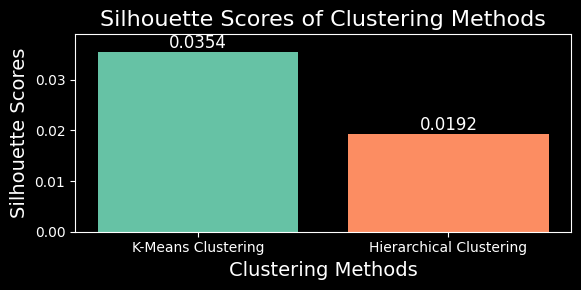

In [141]:
models = ['K-Means Clustering', 'Hierarchical Clustering']
silhouette_scores = [0.03538526273319647, 0.019174360860774183]

sorted_pairs = sorted(zip(silhouette_scores, models), reverse=True)
sorted_silhouette_scores, sorted_models = zip(*sorted_pairs)

palette = sns.color_palette("Set2", len(sorted_models))
colors = palette.as_hex()

plt.figure(figsize=(6, 3))
plt.style.use('dark_background')

bars = plt.bar(
    sorted_models, 
    sorted_silhouette_scores, 
    color=colors
)

for bar, score in zip(bars, sorted_silhouette_scores):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(),                 
        f'{score:.4f}',        
        ha='center', va='bottom',       
        fontsize=12, 
        color='white'                    
    )

plt.xlabel('Clustering Methods', fontsize=14)
plt.ylabel('Silhouette Scores', fontsize=14)
plt.title('Silhouette Scores of Clustering Methods', fontsize=16)
plt.ylim(0, max(sorted_silhouette_scores) * 1.1)  
plt.tight_layout()
plt.show()

The Silhouette Scores for the clustering models are as follows:

- Hierarchical Clustering has a Silhouette Score of 0.019, which is very close to zero. This indicates that the clusters are poorly separated and there is significant overlap between them, suggesting that the model may not have effectively captured distinct groupings in the data.
  
- K-Means Clustering has a slightly higher Silhouette Score of 0.035. While still close to zero, this score indicates that the clusters are marginally better defined than with Hierarchical Clustering, though the clustering still lacks clear separation and is not highly effective.

In both cases, the low Silhouette Scores suggest that neither model has performed well in terms of producing well-separated, meaningful clusters in the dataset.

___

# **The End :)**
==============================================================================================================
___